# Ngữ pháp của biểu đồ với `plotnine`


## Giới thiệu

Trong lĩnh vực phân tích dữ liệu, bên cạnh việc biến đổi dữ liệu, kỹ năng trực quan hóa biểu đồ là kỹ năng đặc biệt quan trọng, giúp cho người đọc báo cáo, phân tích nắm được kết quả phân tích một cách đơn giản hơn.

Với python, việc trực quan hóa thường được sử dụng với `matplotlib` hoặc `searborn`. Tuy nhiên, trong lĩnh vực trực quan hóa dữ liệu, tư tưởng mang tính đột phá là tư duy *ngữ pháp biểu đồ* và được phổ biến rộng rãi qua ngôn ngữ R. Với `python`, ta có thể sử dụng package `plotnine`.

```python
!pip install plotnine
```



Các thư viện khác như `matplotlib` hoặc `searborn` sẽ được trình bày trong các chương tiếp theo

---

Khái niệm "ngữ pháp của biểu đồ" cho rằng: Mỗi  biểu đồ được tạo ra do 2 hay nhiều lớp chống lấn mà thành. Các lớp của biểu đồ bao gồm

**Các lớp (layer) cơ bản (bắt buộc phải có)**:

1. **Dữ liệu (data)**: Tập số liệu được sử dụng cho việc xây dựng biểu đồ.
2. **Biến (aesthetic attribute)**: Xác định các biến trong dữ liệu được sắp xếp như thế nào. VD: trục tung, trục hoành là biến nào? Màu sắc được sắp xếp theo biến nào? Độ lớn của mỗi điểm được xác định theo biến nào?
3. **Tính chất hình học của biểu đồ (geometric object)**: xác định loại biểu đồ được sử dụng. VD: biểu đồ cột, biểu đồ điểm (scatter plot), biểu đồ dây (line chart)

**Các lớp (layer) nâng cao (không bắt buộc)**:

4. **Facet** (tạm dịch: cách thức sắp xếp số liệu trên cùng 1 biểu đồ): Xác định cách thức sắp xếp vị trí của nhiều biểu đồ trên cùng một màn hình.
5. **Tính toán thống kê (statistical transformation)**: Sử dụng các tính toán trong biểu đồ. VD: Thêm các biểu đồ xu hướng dạng trơ (geom_smooth) , số lượng bin trong histogram... Lớp này có thể nằm lồng trong ngay trong nhóm `aesthetics`
6. **Vị trí (position)**: Xác định vị trí trong biểu đồ
7. **Trục tọa độ (Coordinate)**: Xác định hệ trục tọa độ vẽ biểu đồ. VD: Hệ tọa độ 3 trục trong không gian (hệ tọa đồ Descartes), hệ tọa độ cực

Các lớp trong biểu đồ có thể thể hiện thành các lớp như sau

![](Image/ggplot2-01.png)


> Việc hiểu và nắm vững nguyên lý của `ggplot2` sẽ cho phép chúng ta xây dựng gần như bất kỳ biểu đồ nào.



## Xây dựng biểu đồ

### Biểu đồ cơ bản

Câu lệnh cơ bản của `ggplot` như sau:

```{python}
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))
```

In [1]:
import pandas as pd
# Sử dụng data mpg
from plotnine.data import mpg
# Sử dụng tất cả các hàm trong plotnine
from plotnine import *

In [2]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [3]:
# Set theme minimal
import plotnine as pln
pln.theme_set(theme_minimal)

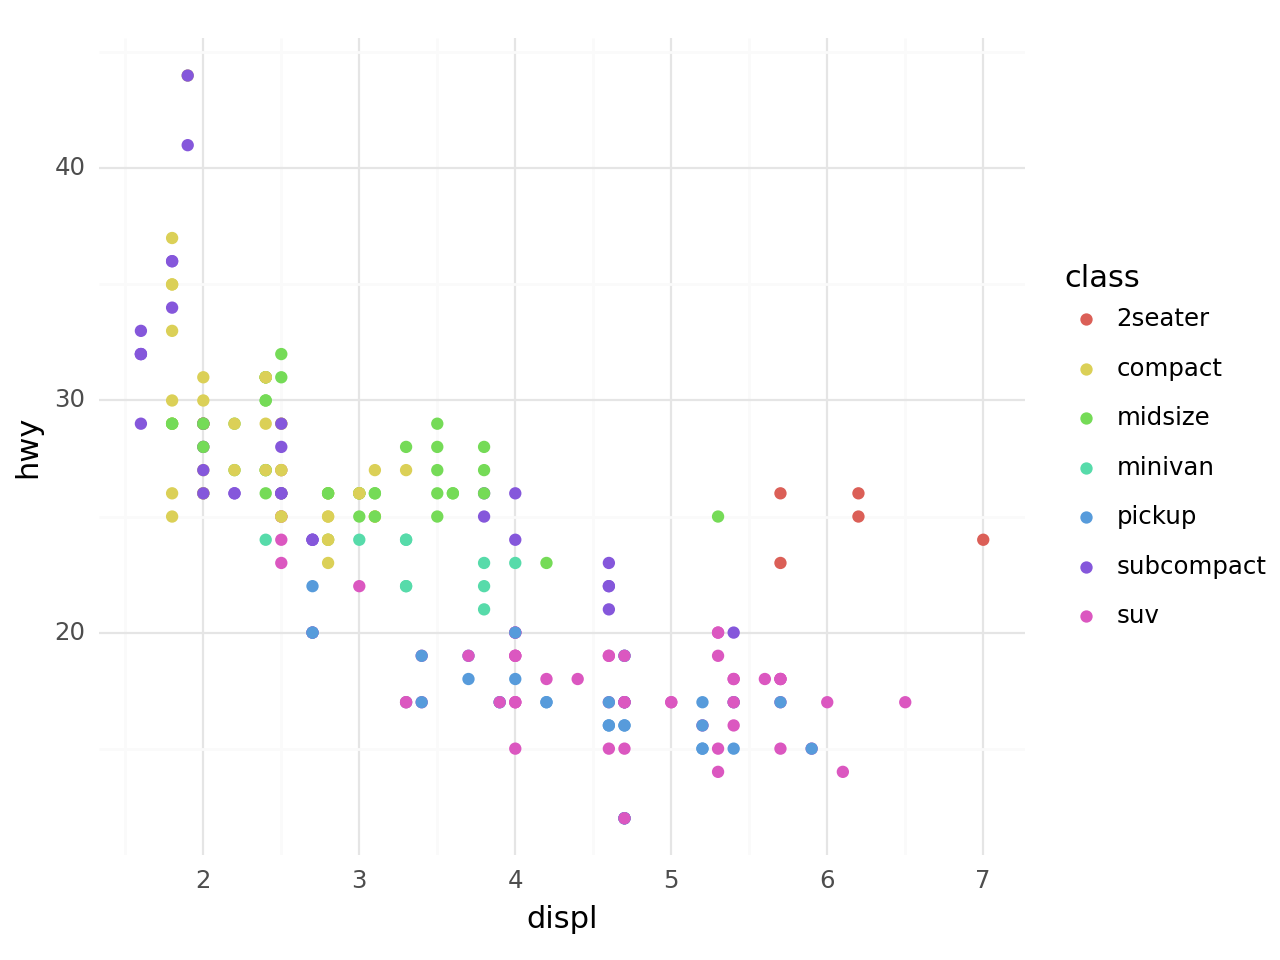

<Figure Size: (640 x 480)>

In [4]:
ggplot(data = mpg) + \
  geom_point(mapping = aes(x = "displ", # Trục x là displ
                           y = "hwy",   # Trục y là hwy
                           color = "class")) # Color là class



Trong ví dụ trên, ta đã vẽ biểu đồ điểm (`geom_point`) với tập dữ liệu `mpg` để phân tích quan hệ giữa hai biến `displ` và `hwy` và phân nhóm màu theo class.

Ta có thể vẽ biểu đồ với kích thước của từng điểm theo `cyl` như sau.

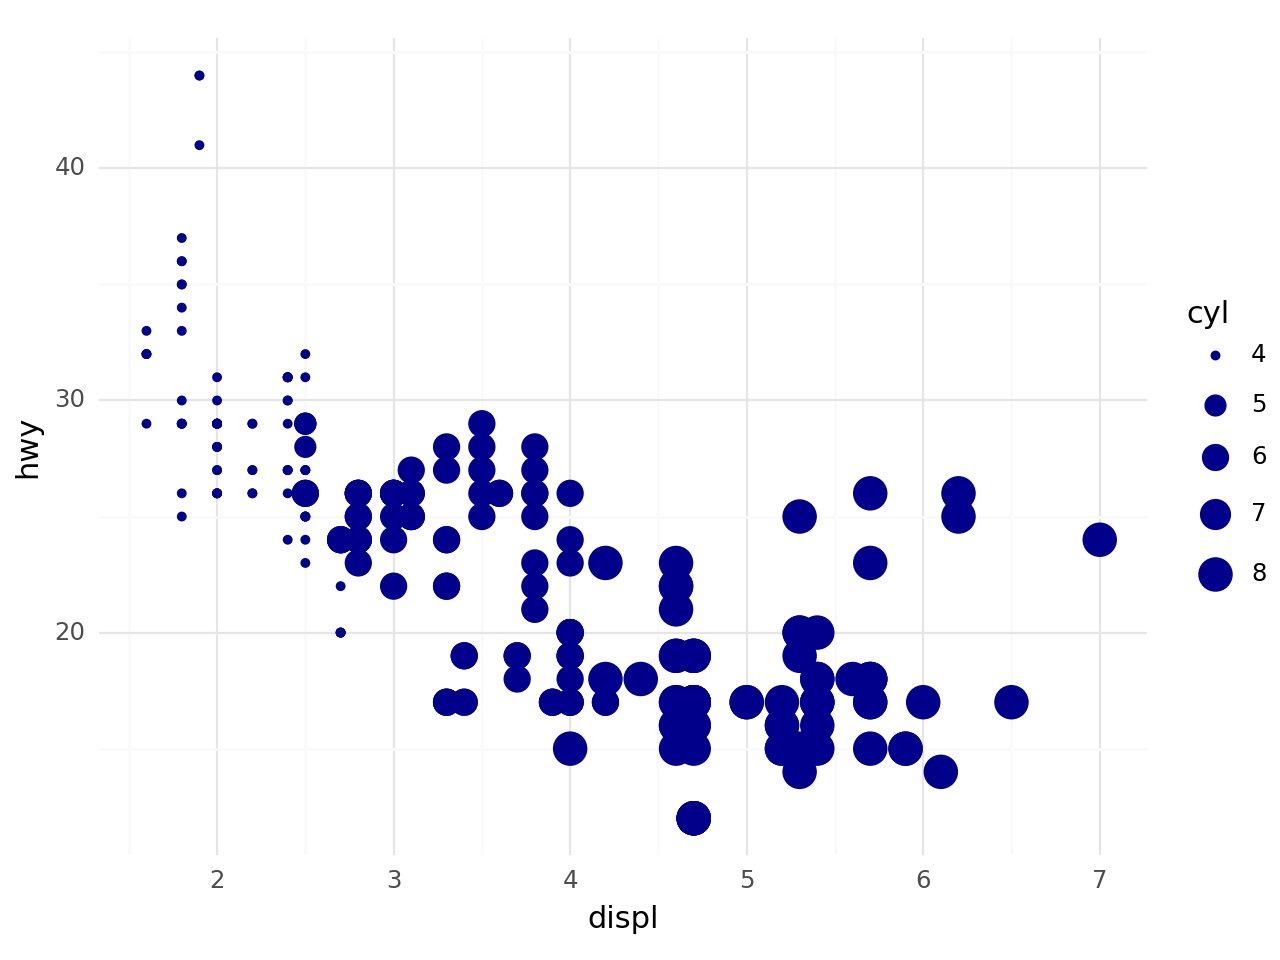

<Figure Size: (640 x 480)>

In [5]:
ggplot(data = mpg) + \
  geom_point(mapping = aes(x = "displ",   # Trục x là displ
                           y = "hwy",     # Trục y là hwy
                           size = "cyl"), # Kích thước theo cyl
             color = "darkblue")          # Tất cả các điểm có màu là blue

### Facet


`Facet` cho phép chúng ta chia dữ liệu thành nhiều phần theo từng nhóm và xây dựng biểu đồ cho mỗi nhóm trong đó. Câu lệnh của facet như sau

```{python
facet_wrap( group_variable,   # Chia nhóm
            nrow = 2,         # Số lượng dòng trong biểu đồ  
            scale = "free")   # "free" cho phép biểu đồ auto scale
```

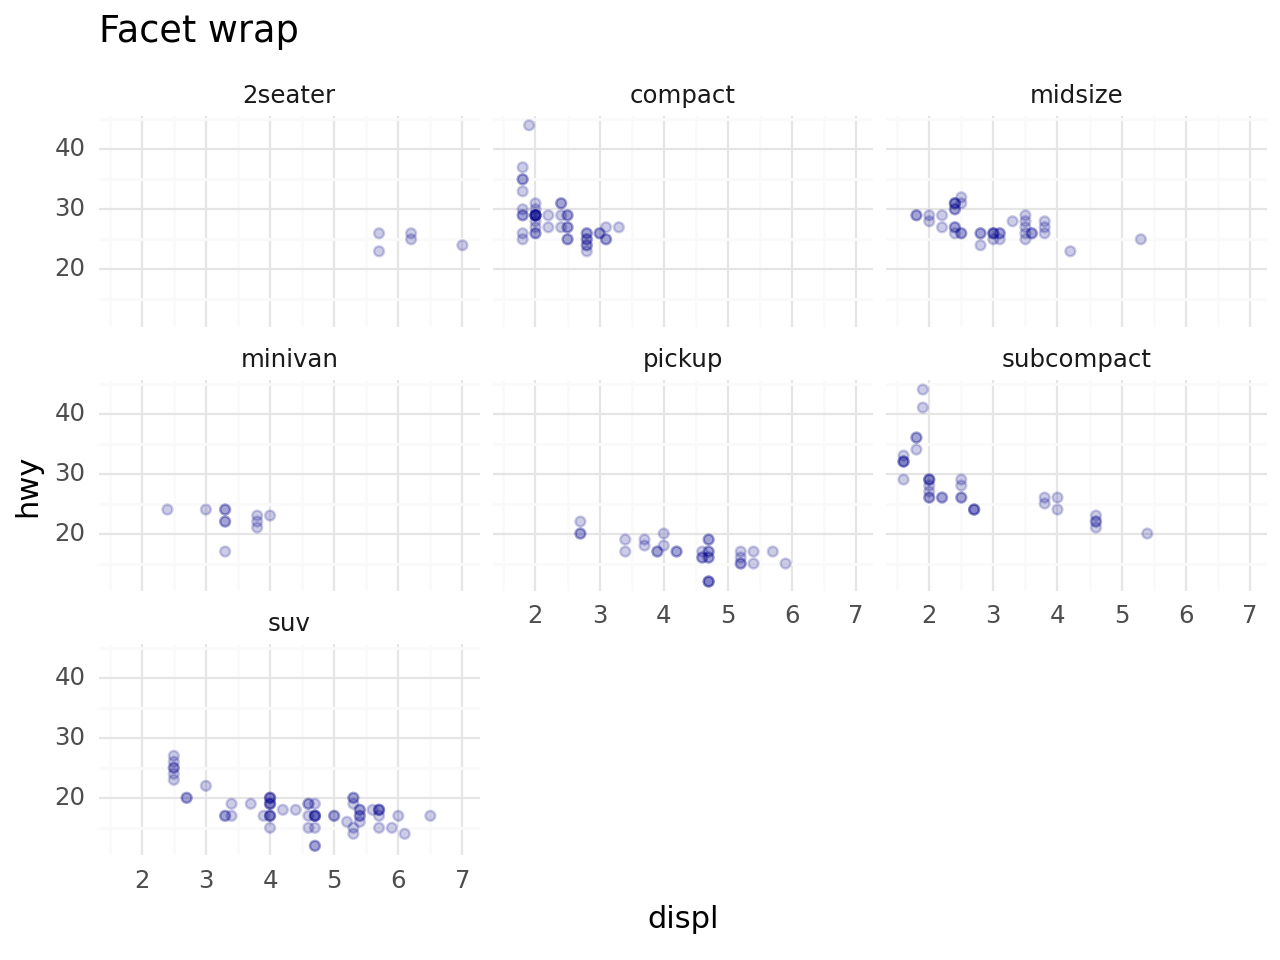

<Figure Size: (640 x 480)>

In [6]:
ggplot(data = mpg) + \
  geom_point(mapping = aes(x = "displ", 
                           y = "hwy"),
             color = "darkblue", 
             alpha = 0.2) +\
facet_wrap("class") + \
labs(title = "Facet wrap")

**Lưu ý**: Ta có thể viết cách khác như sau

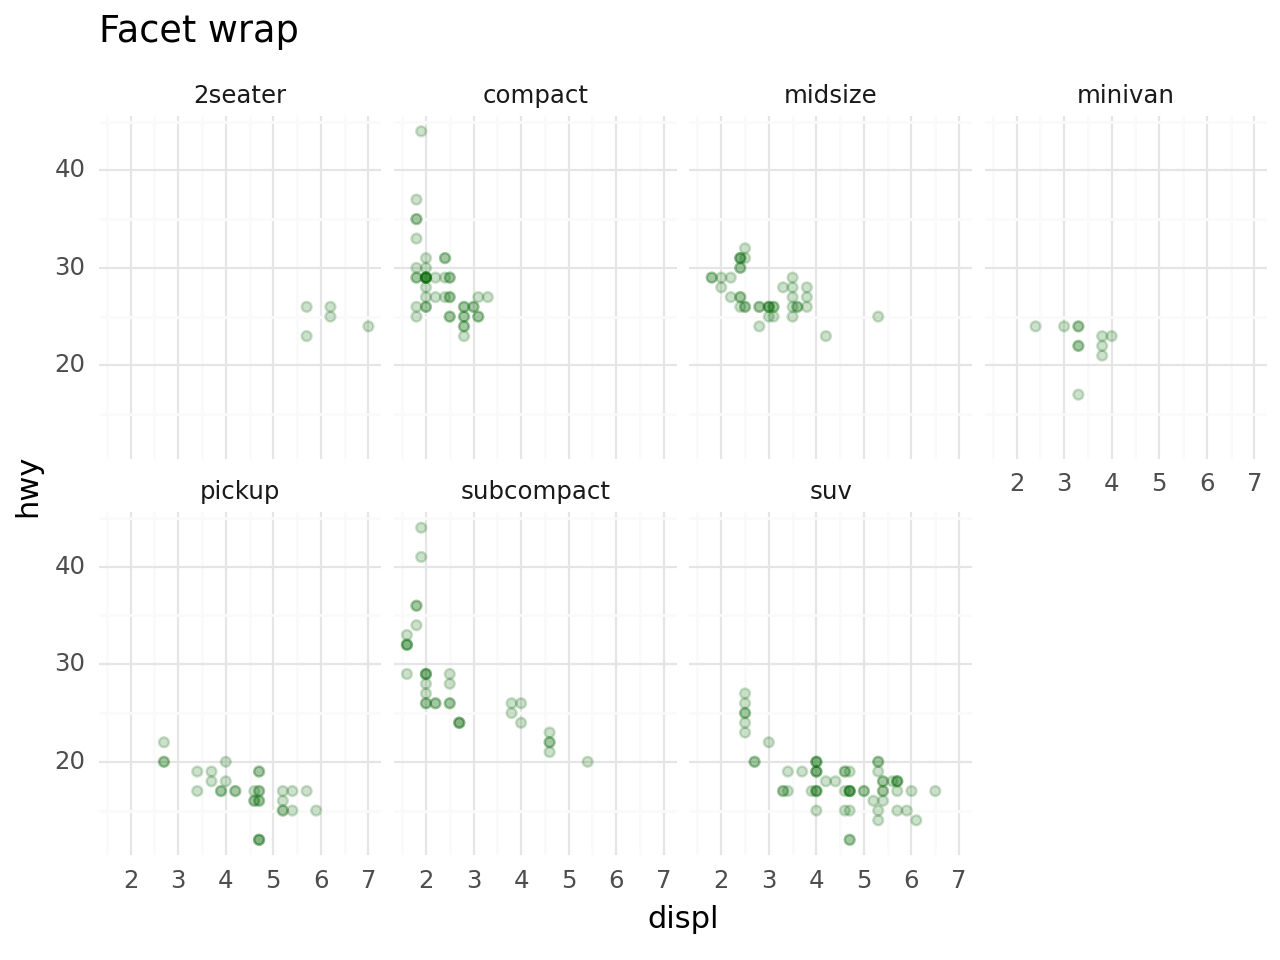

<Figure Size: (640 x 480)>

In [7]:
(
    ggplot(data = mpg)
        + geom_point(mapping = aes(x = "displ", 
                                y = "hwy"),
                                color = "darkgreen", 
                                alpha = 0.2)
        + facet_wrap("class", 
                    nrow = 2) 
        + labs(title = "Facet wrap")
)


### Thuộc tính hình học - geom

Các loại biểu đồ khác nhau trong `plotnine` chỉ khác nhau ở `geom_` - thuộc tính hình học của biểu đồ. Mỗi `geom` sẽ có các tham số khác nhau cần được điều chỉnh.

Trong ví dụ dưới đây, ta vẽ 2 loại biểu đồ chồng lên nhau gồm 1. biểu đồ điểm và 2. biểu đồ thể hiện xu hướng

c:\Users\Hoang Duc Anh\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


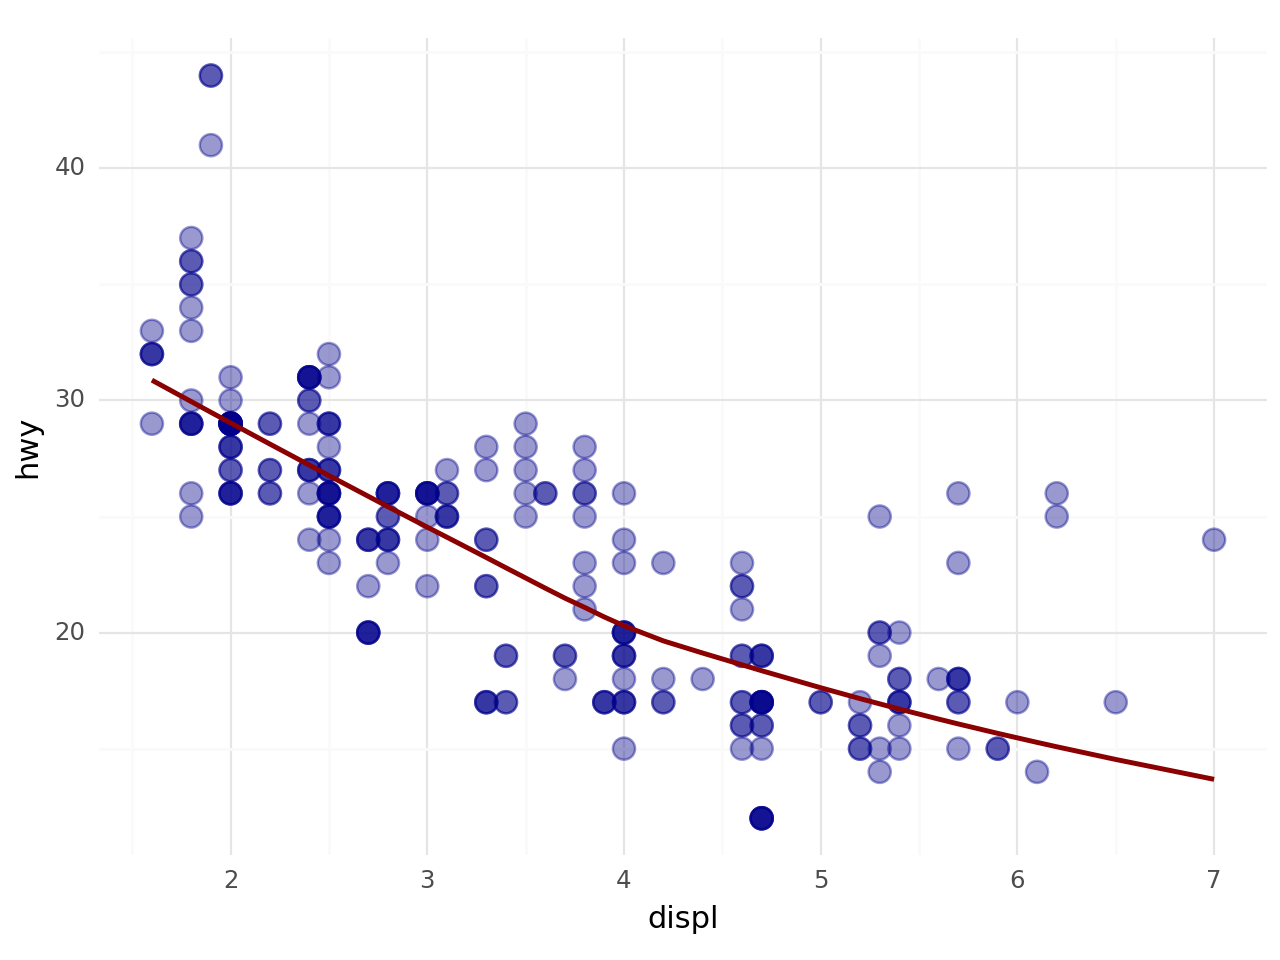

<Figure Size: (640 x 480)>

In [8]:
ggplot(mpg, 
  mapping = aes("displ", "hwy")) +\
  geom_point(color = "darkblue", alpha = 0.4, size = 4) +\
  geom_smooth(color = "darkred")



**Lưu ý**: Khi có nhiều `geom_object`, nếu không có sự điều chỉnh khi mapping của từng `geom`, các lớp sau sẽ lấy các biến `global` để làm thuộc tính. Trong ví dụ trên, hai lớp `geom_point` và `geom_smooth` lấy giá trị mặc định là `aes(displ, hwy)`


c:\Users\Hoang Duc Anh\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
c:\Users\Hoang Duc Anh\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
c:\Users\Hoang Duc Anh\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


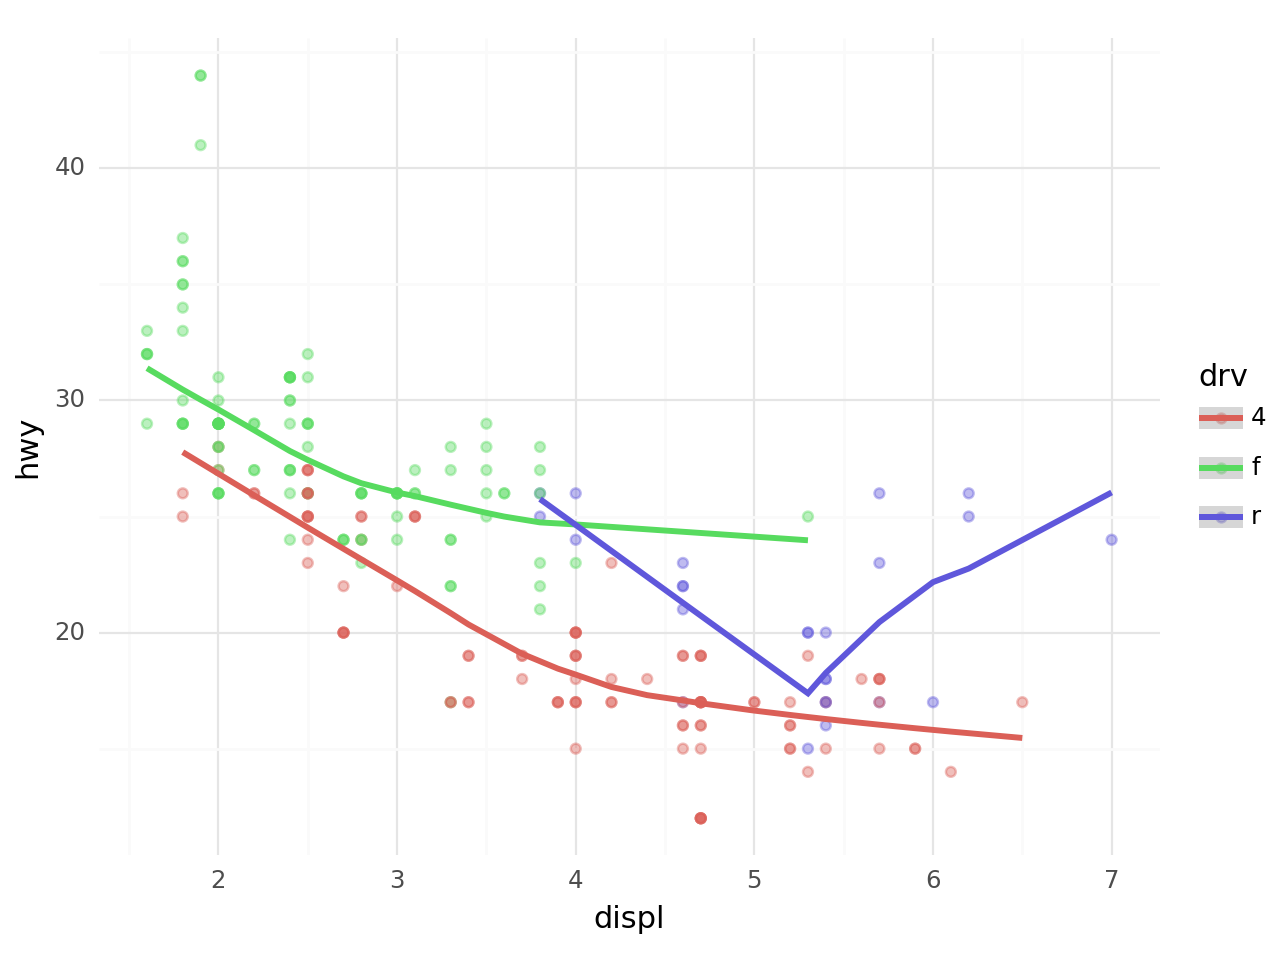

<Figure Size: (640 x 480)>

In [9]:
ggplot(mpg, mapping = aes("displ", "hwy")) +\
  geom_point(aes(color = "drv"), alpha = 0.4) +\
  geom_smooth(aes(color = "drv"),
              size = 1.2)



Trong `plotnine` có rất nhiều `geom` phục vụ các loại biểu đồ khác nhau. Tuy nhiên, để phục vụ công viên thực tế, trong `ggplot2` cần nắm vững các loại `geom` quan trọng nhất như sau.

- `geom_point`: Biểu đồ điểm
- `geom_line`: Biểu đồ đường
- `geom_boxplot`: Biểu đồ boxplot
- `geom_col`, `geom_bar`: Biểu đồ cột
- `geom_smooth`: Biểu đồ vẽ xu hướng
- `geom_histogram`, `geom_density`: Biểu đồ phân phối

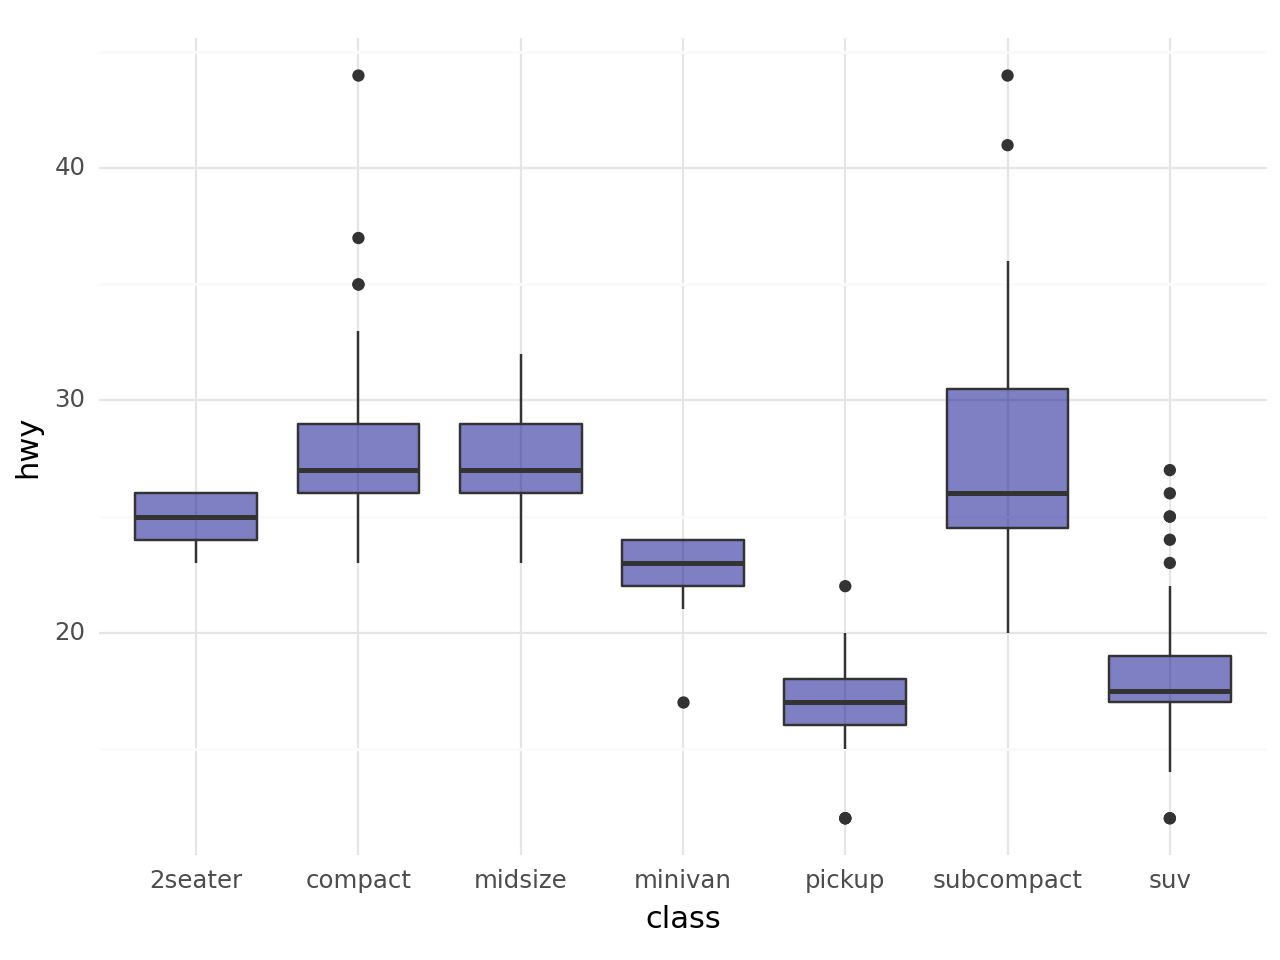

<Figure Size: (640 x 480)>

In [10]:
# geom_boxplot
ggplot(mpg, aes("class", "hwy")) +\
  geom_boxplot(fill = "darkblue", alpha = 0.5)

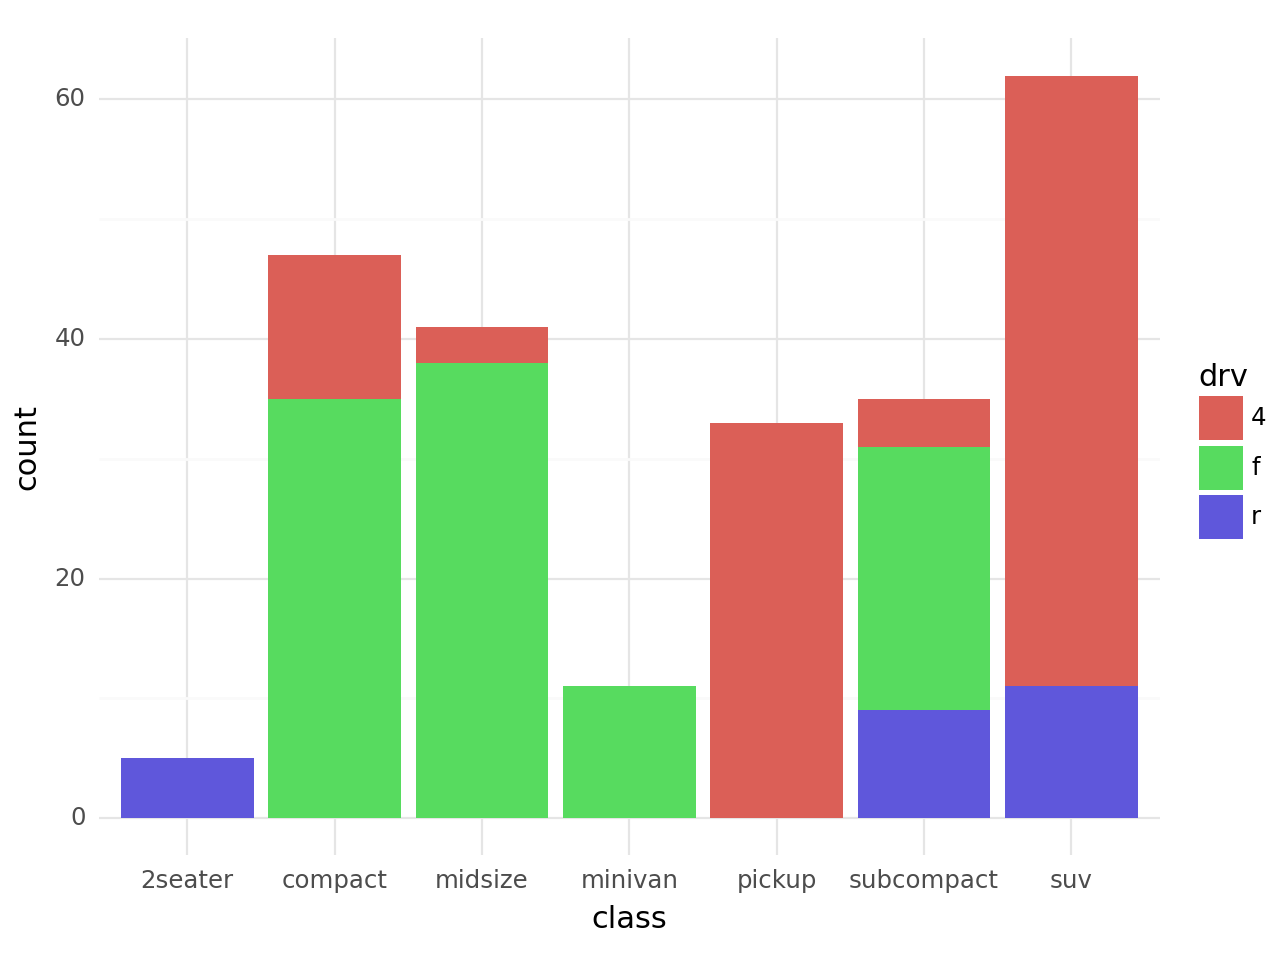

<Figure Size: (640 x 480)>

In [11]:
# geom_col
ggplot(mpg, aes("class")) +\
  geom_bar(aes(fill = "drv"))

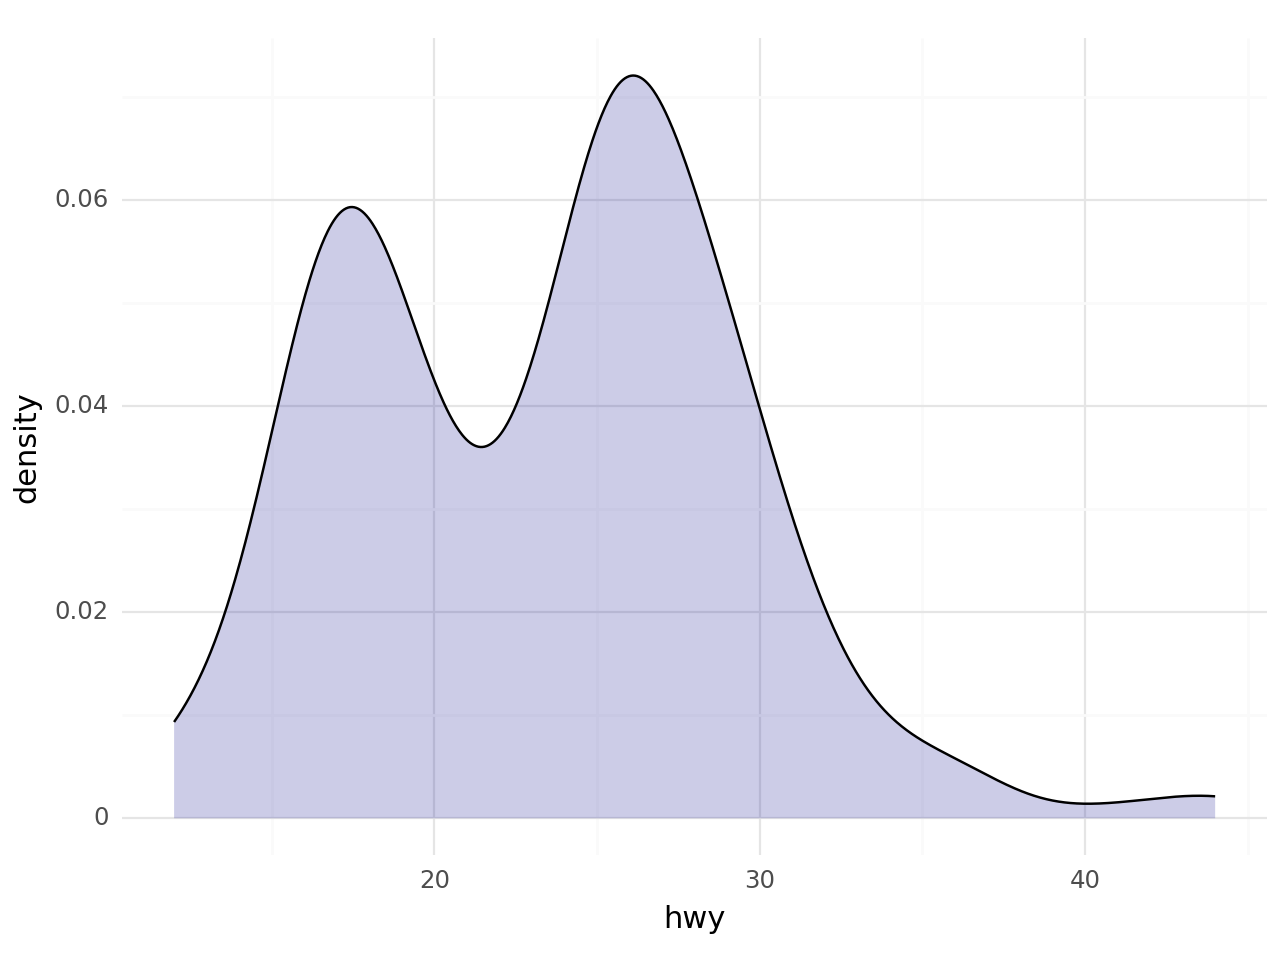

<Figure Size: (640 x 480)>

In [12]:
# geom_density
ggplot(mpg, aes("hwy")) +\
  geom_density(fill = "darkblue", alpha = 0.2)

c:\Users\Hoang Duc Anh\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 11'. Pick better value with 'binwidth'.


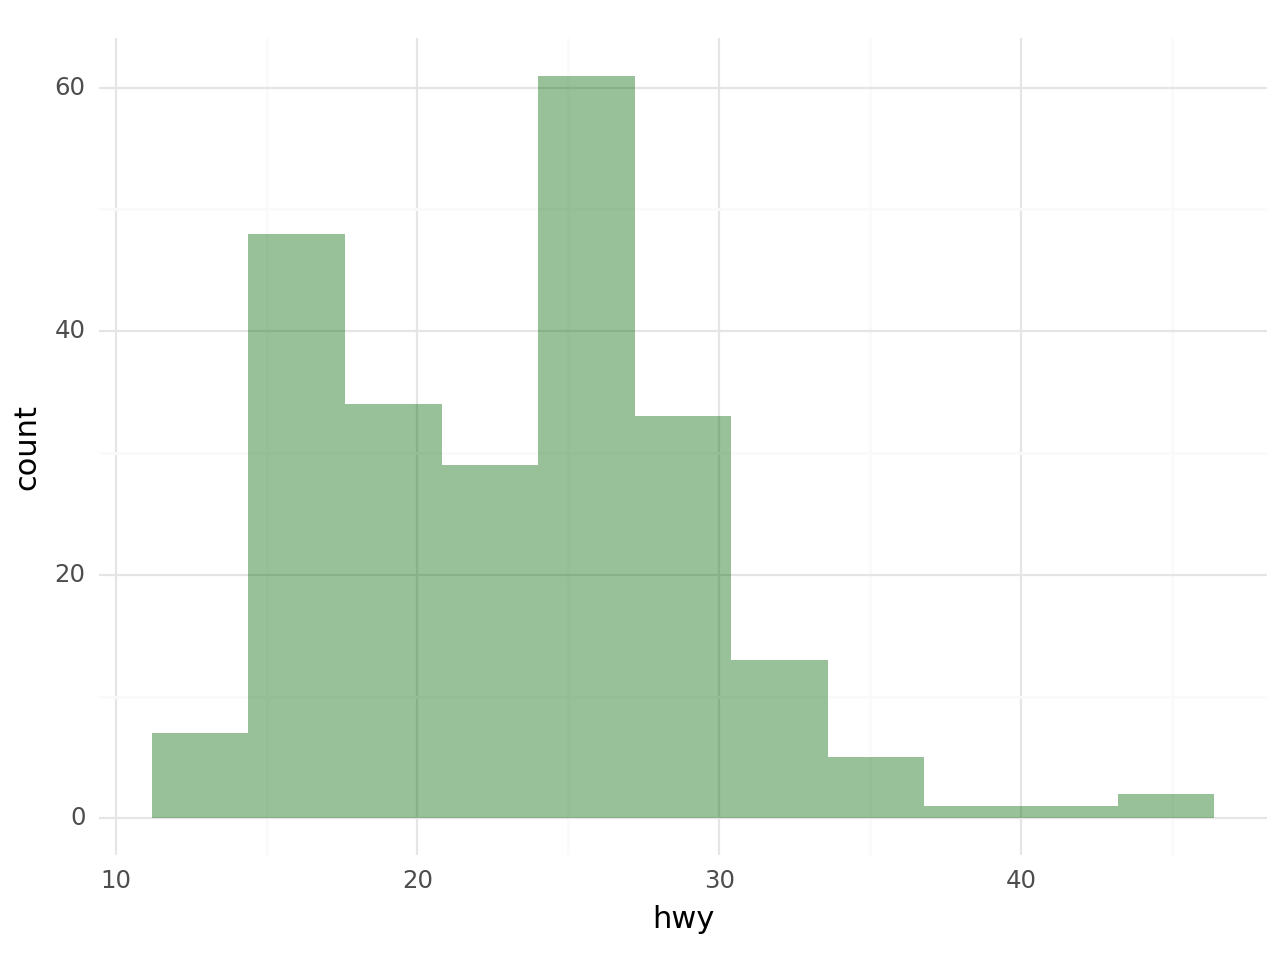

<Figure Size: (640 x 480)>

In [13]:
# geom_histogram
ggplot(mpg, aes("hwy")) +\
  geom_histogram(fill = "darkgreen", alpha = 0.4)


### Tính toán thống kê - statistical transformations

Đối với lớp *tính toán thống kê* (statistical transformation), biểu đồ không được vẽ trực tiếp với 2 trục tung và trục hoành mà sẽ phải trải qua bước tính toán thống kê trước.

Xem ví dụ biểu đồ cột dưới đây.

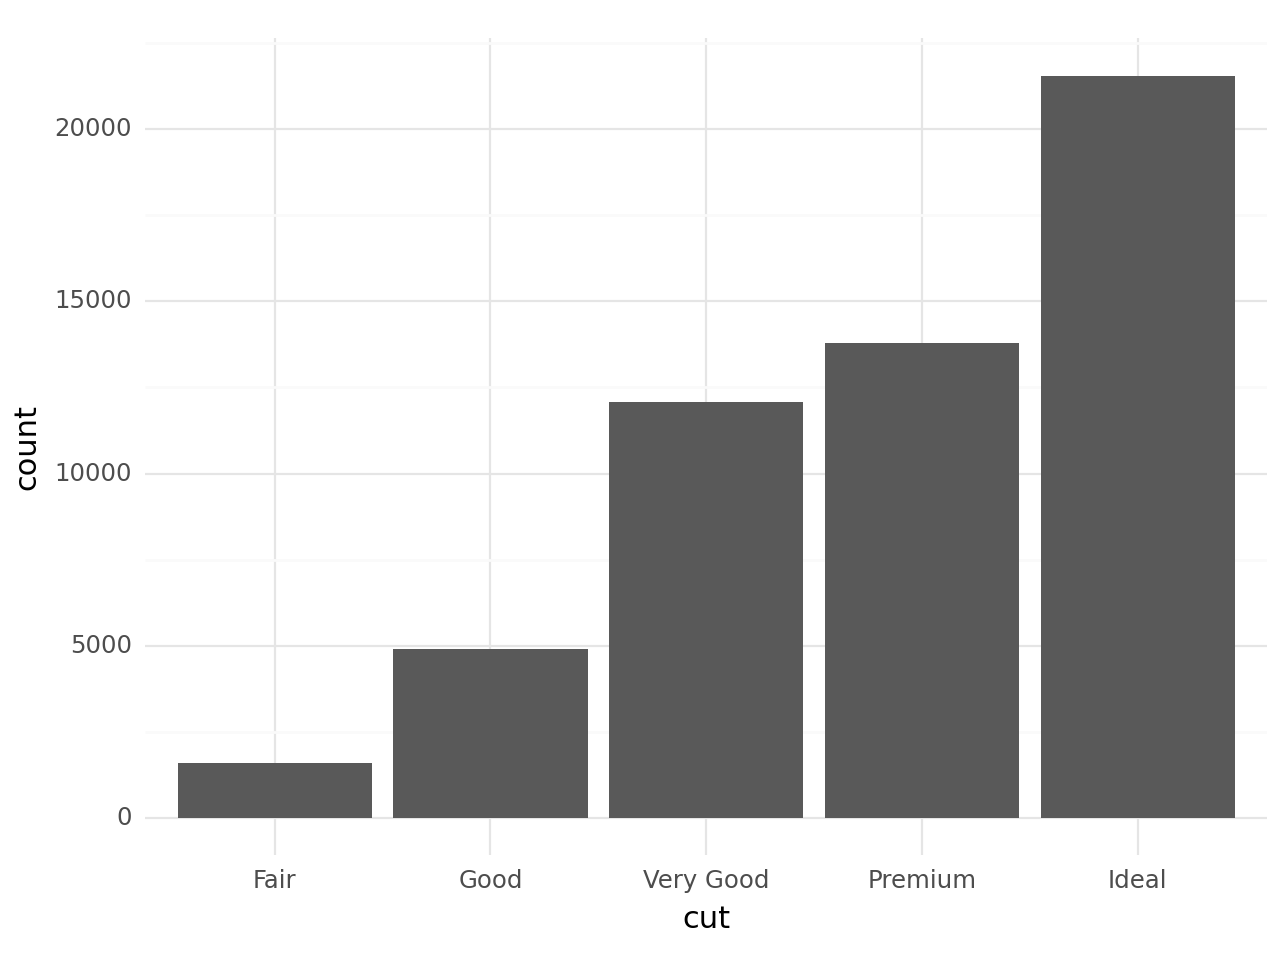

<Figure Size: (640 x 480)>

In [14]:
from plotnine.data import diamonds

ggplot(diamonds) +\
  geom_bar(mapping = aes(x = "cut"))


Ở ví dụ này, trục `x` là các nhóm của `cut` trong khi trục `y` là `số lượng quan sát` ở mỗi nhóm, giá trị này không phải là biến trực tiếp từ dữ liệu mà là 1 biến phái sinh. Quá trình xây dựng biểu đồ được thực hiện qua 3 bước như sau.

![](Image/ggplot2-02.png)

Ta cũng có thể thay đổi lớp biến đổi dữ liệu trong biểu đồ trên để hiển thị dạng tổng của 1 biến bất kỳ như sau.

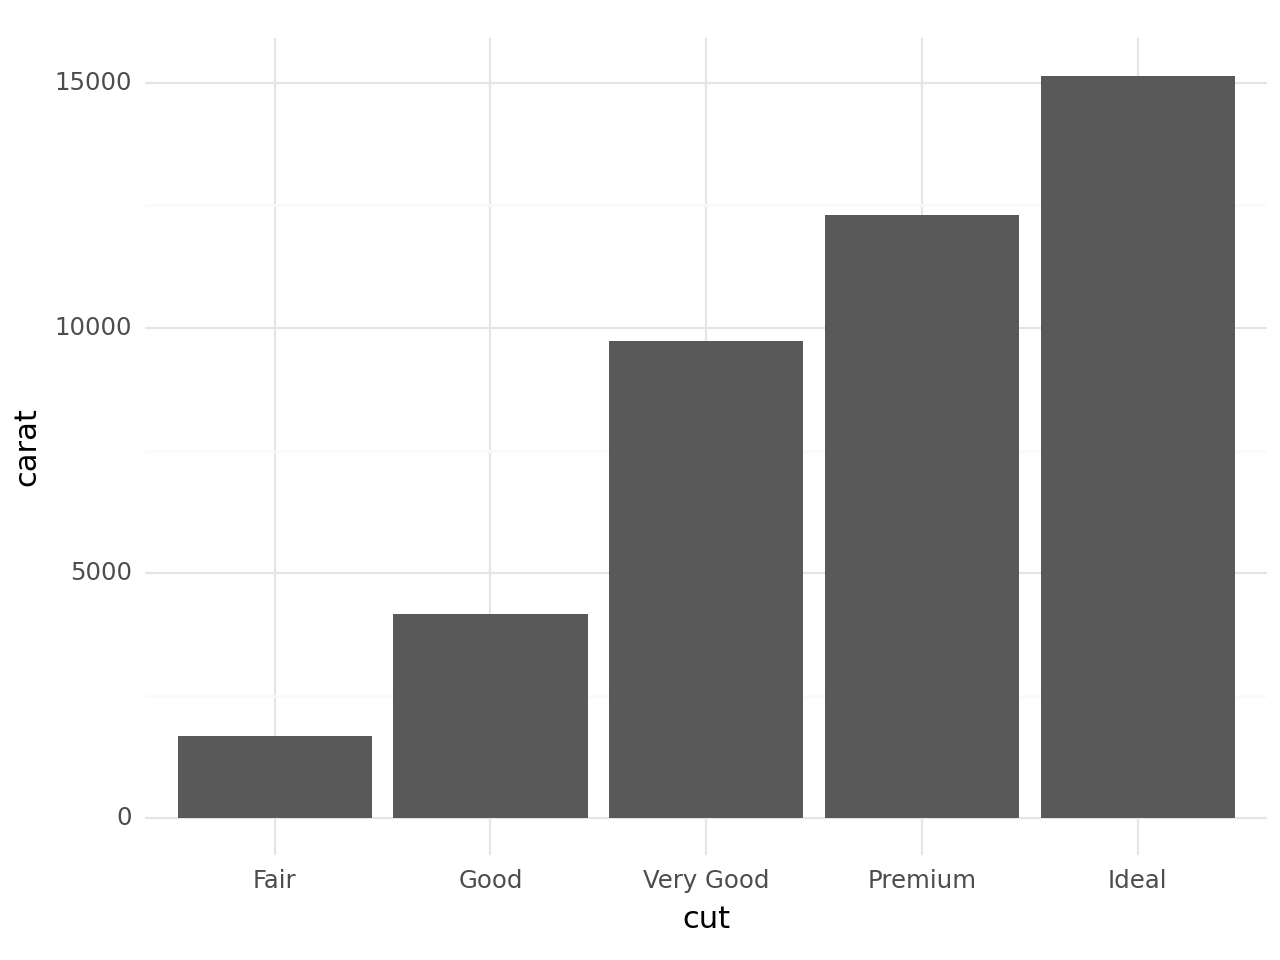

<Figure Size: (640 x 480)>

In [15]:
ggplot(diamonds) +\
  geom_bar(mapping = aes(x = "cut", y = "carat"), stat = "identity", group = 1)

### Vị trí trong biểu đồ

Quay lại ví dụ `bar chart` phía trên, khi xây dựng biểu đồ có 2 hoặc nhiều nhóm, biểu đồ có thể có 3 kiểu vị trí như sau:

- `position = "identity"` (default): Giữ nguyên chế độ mặc định, để dạng stack bar với giá trị trục y mặc định
- `position = "fill"`: Tương tự "identity" nhưng mỗi cột sẽ có tỷ trọng bằng nhau
- `position = "dodge"`: Phân nhóm biểu đồ

Xem ví dụ dưới đây.

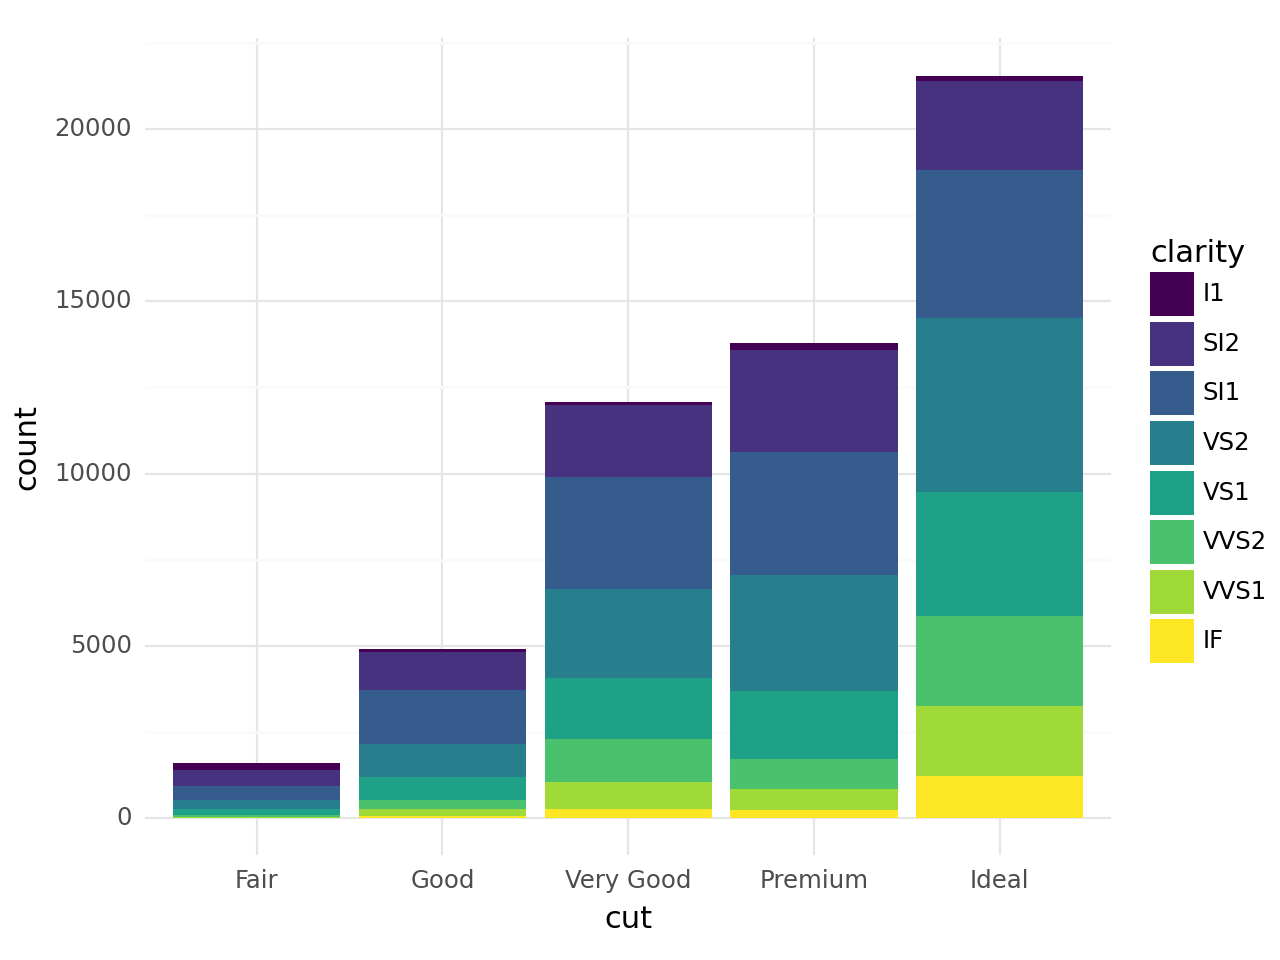

<Figure Size: (640 x 480)>

In [16]:
# position = "identity"
ggplot(diamonds) +\
  geom_bar(mapping = aes(x = "cut", fill = "clarity"))

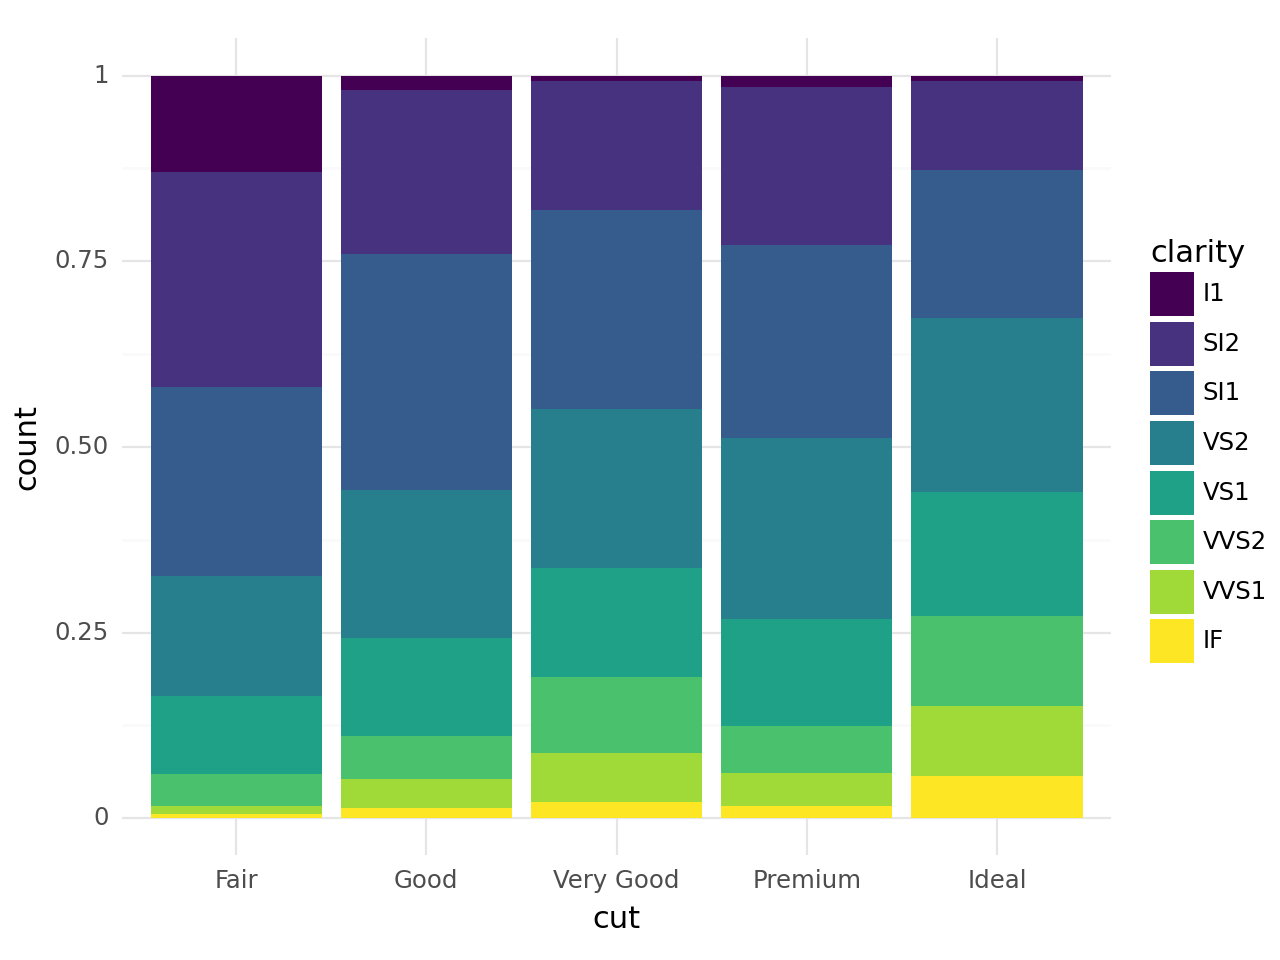

<Figure Size: (640 x 480)>

In [17]:
# position = "fill"
ggplot(diamonds) +\
  geom_bar(mapping = aes(x = "cut", fill = "clarity"), 
           position = "fill")

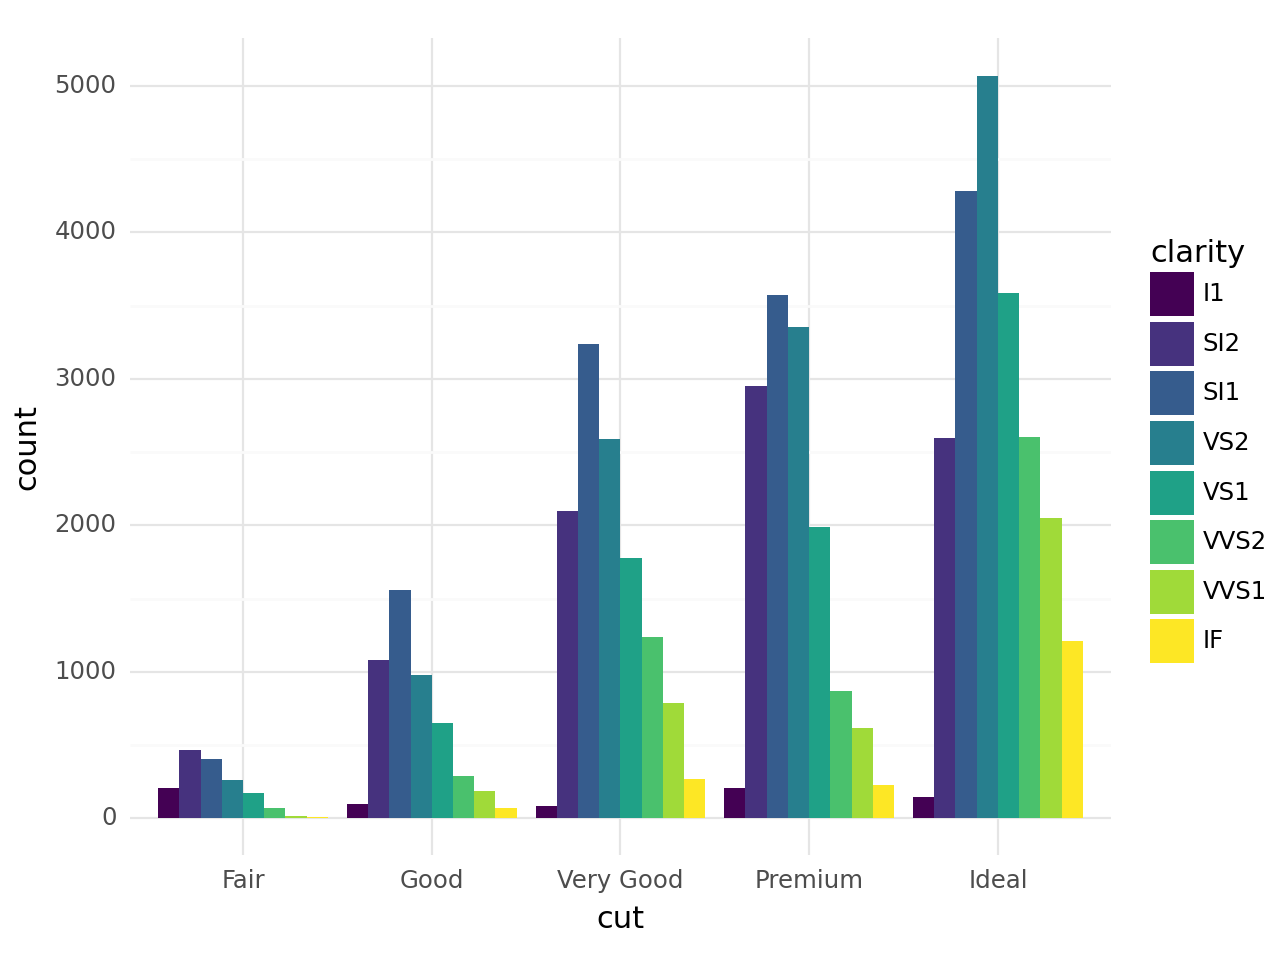

<Figure Size: (640 x 480)>

In [18]:
# position = "dodge"
ggplot(diamonds) +\
  geom_bar(mapping = aes(x = "cut", fill = "clarity"), 
           position = "dodge")


Bên cạnh 3 nhóm `position` trên, biểu đồ điểm còn có nhóm riêng là `postion = "jitter"`. Option này cho phép thay đổi giá trị của mỗi điểm một lượng nhỏ để biểu đồ điểm không bị trùng lặp nhiều quan sát (khi nhiều quan sát có chung một giá trị). Nhóm này có thể sử dụng tương đương với `geom_jitter`.

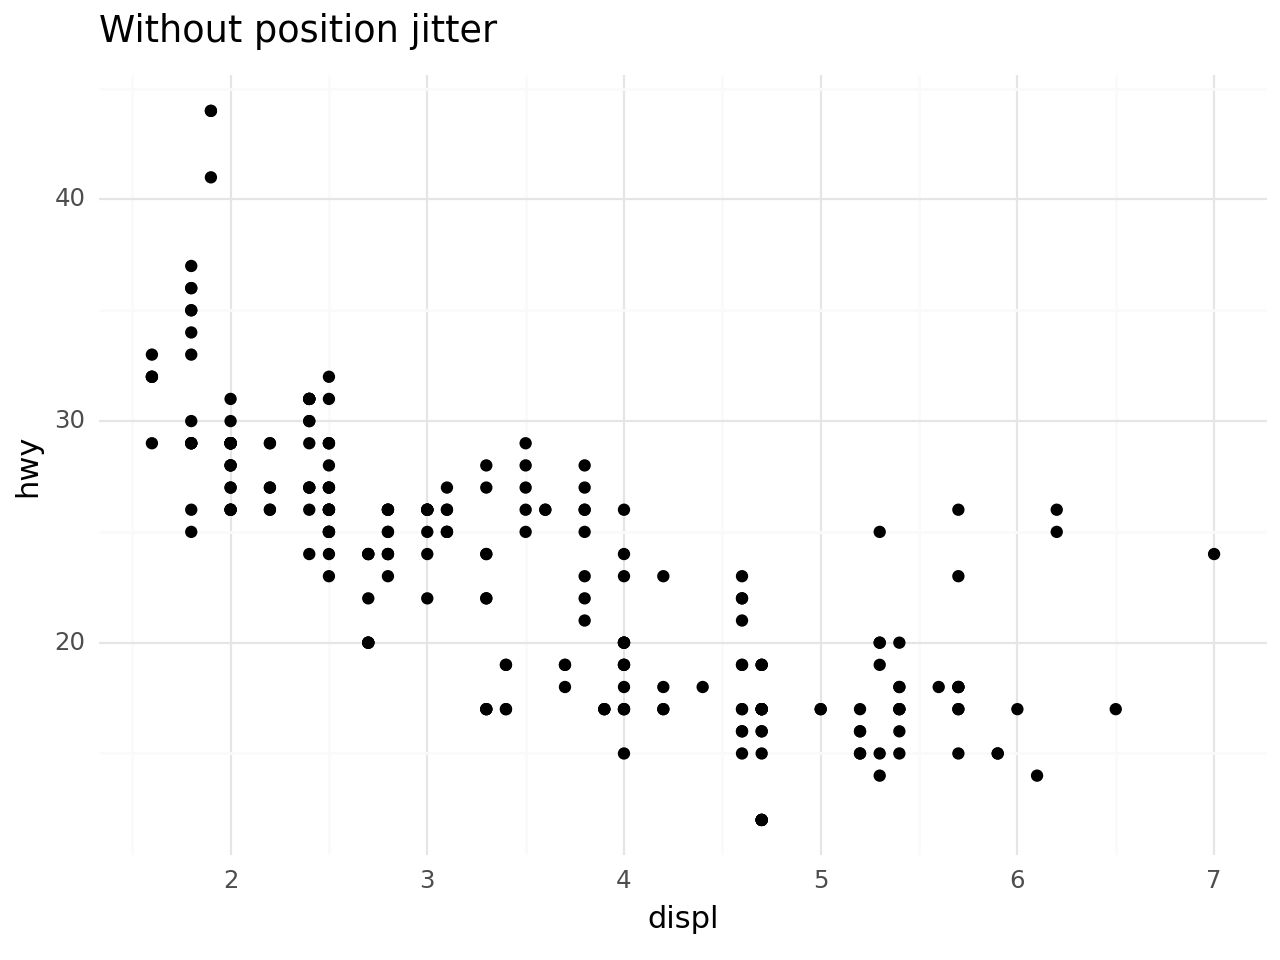

<Figure Size: (640 x 480)>

In [19]:
ggplot(data = mpg) +\
  geom_point(mapping = aes(x = "displ", y = "hwy")) +\
  labs(title = "Without position jitter")

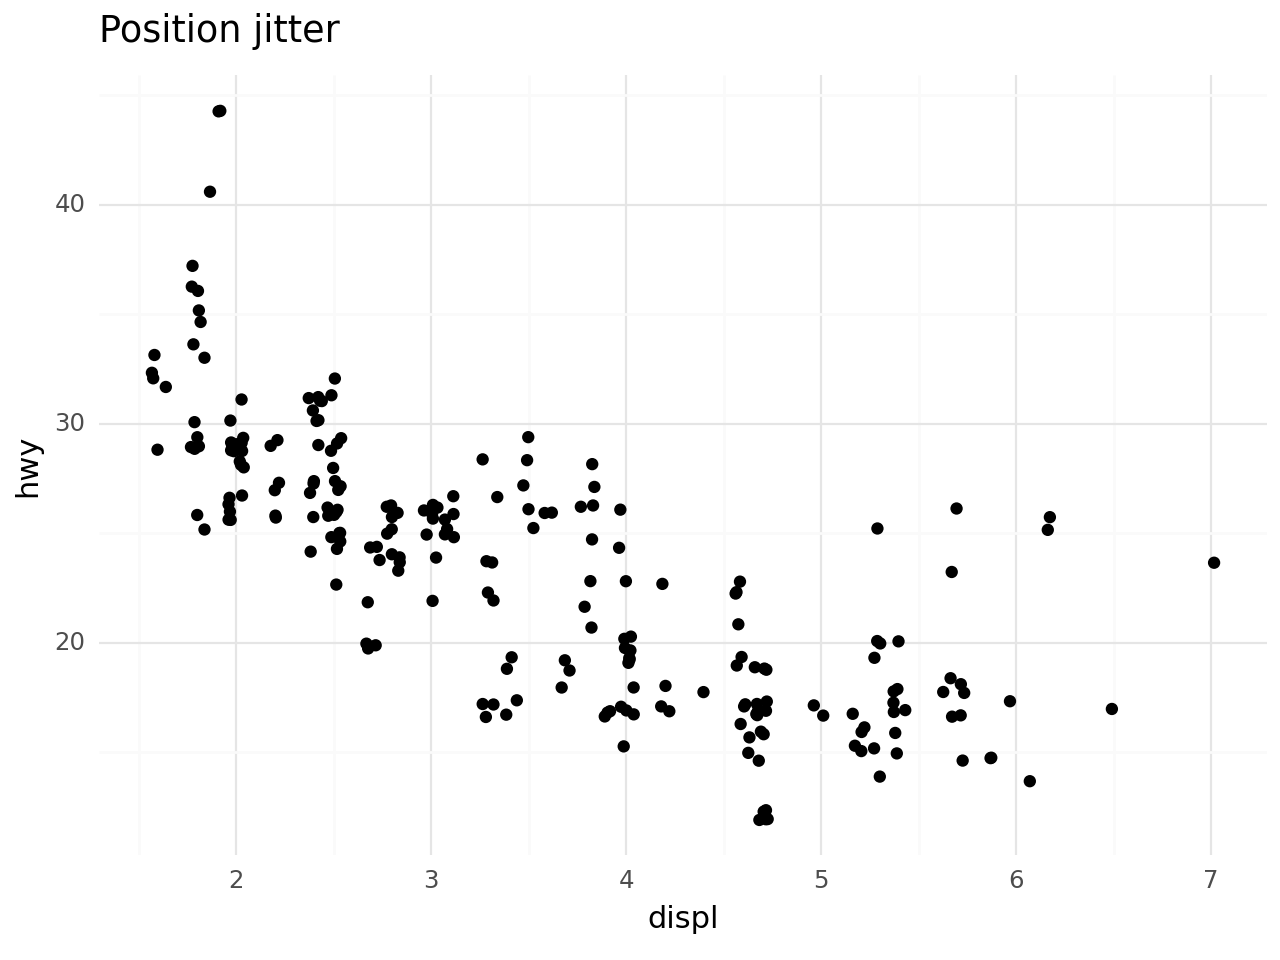

<Figure Size: (640 x 480)>

In [20]:
ggplot(data = mpg) + \
  geom_point(mapping = aes(x = "displ", y = "hwy"), 
             position = "jitter") + \
  labs(title = "Position jitter")


<center><font size=4>&sect;</font></center>


Đối với biểu đồ miền (area chart), ta có thể sử dụng option `position = "fill"` để thể hiện dạng phần trăm.

In [21]:
import pandas as pd
import numpy as np

# Tạo dữ liệu giả lập
year = np.arange(1875, 1973)
group = ["A", "B", "C"]
df = np.array(np.meshgrid(year, group)).\
    reshape(2, len(year) * len(group))
# Convert sang data frame
df = pd.DataFrame({
    'year' : df[0],
    'group' : df[1]
})
# Tạo biến level
df['level'] = np.random.normal(50, 10, df.shape[0])

# Chỉnh sửa category
df['year'] = df['year'].astype('float')
df['group'] = df['group'].astype('category')

df.head()

,year,group,level
0,1875.0,A,47.532653
1,1876.0,A,38.900201
2,1877.0,A,61.386196
3,1878.0,A,52.910796
4,1879.0,A,40.989734


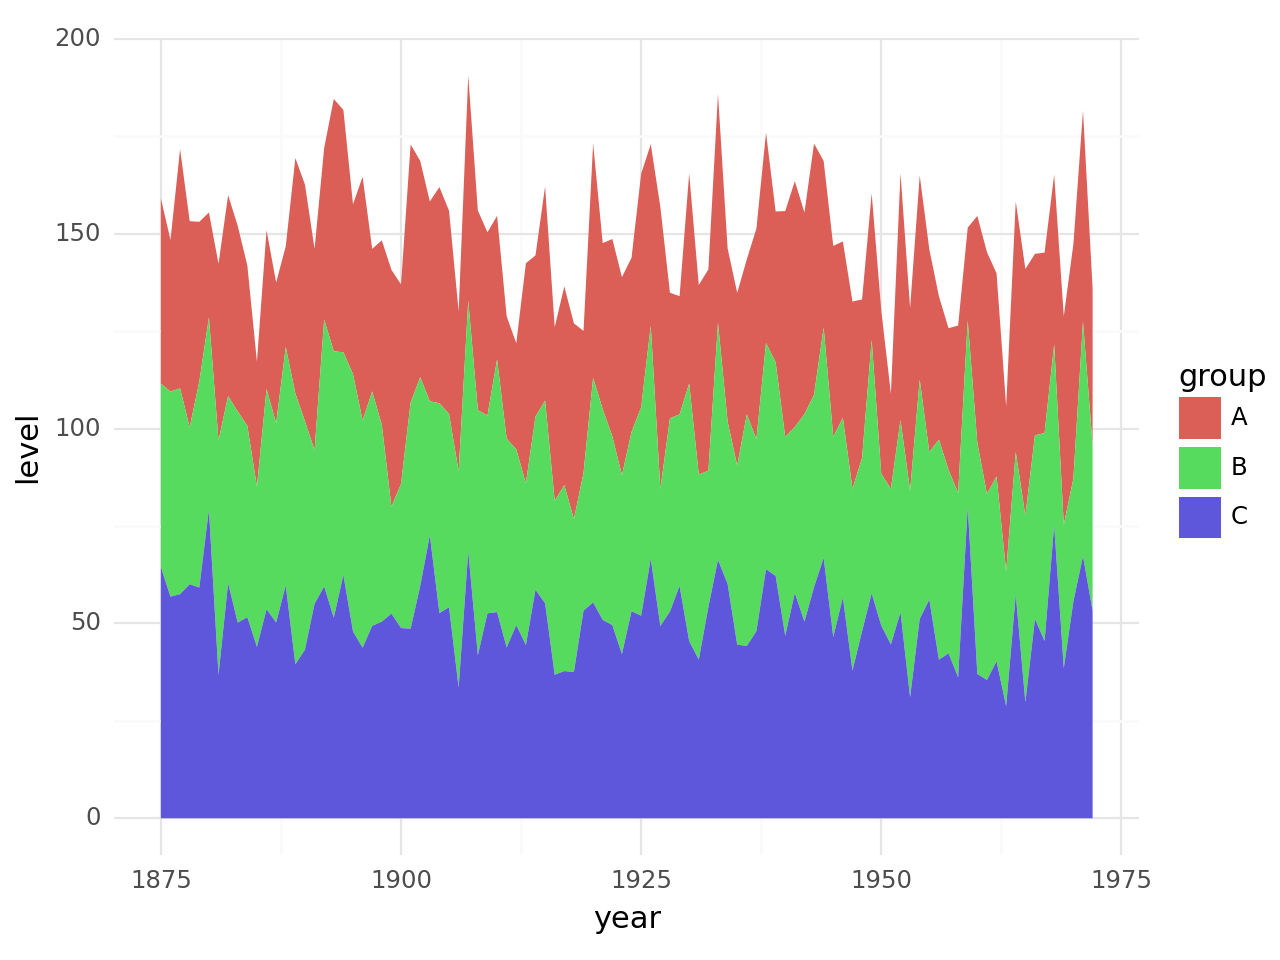

<Figure Size: (640 x 480)>

In [22]:
# Lấy theo số tuyệt đối
ggplot(df, aes("year", "level")) +\
  geom_area(aes(fill = "group"))


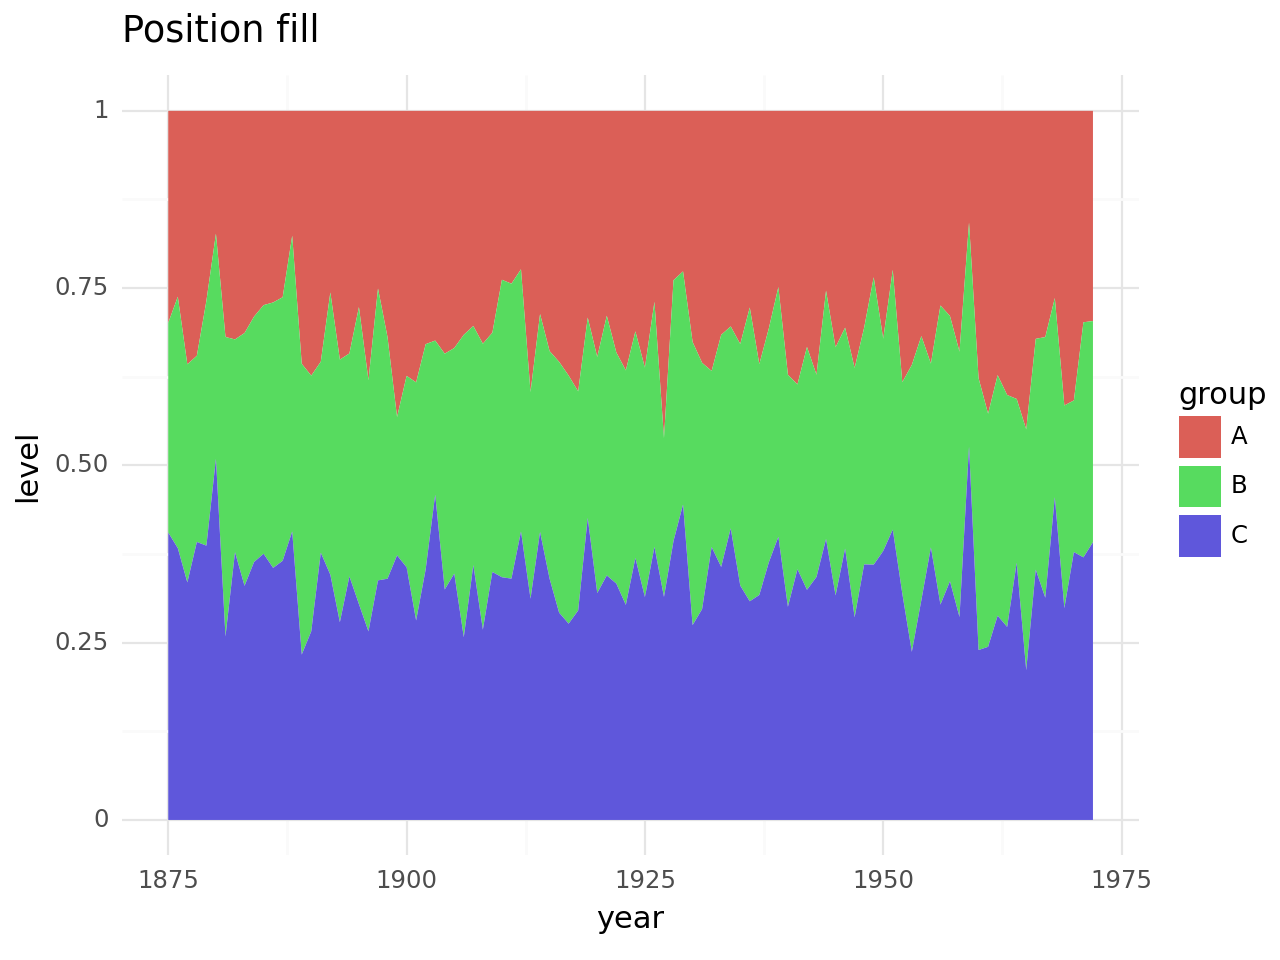

<Figure Size: (640 x 480)>

In [23]:
# Lấy theo tỷ lệ
ggplot(df, aes("year", "level")) +\
  geom_area(aes(fill = "group"), 
            position = position_fill()) +\
  labs(title = "Position fill")

### Hệ trục tọa độ

Biểu đồ thông thường được xây trên hệ trục tọa độ Đề-các với tỷ lệ 1-1. Bên cạnh hệ trục này, `ggplot2` hỗ trợ các hệ trục tọa độ khác nhưng thông dụng nhất là `coord_flip`, cho phép đổi vị trí hai trục tọa độ cho nhau

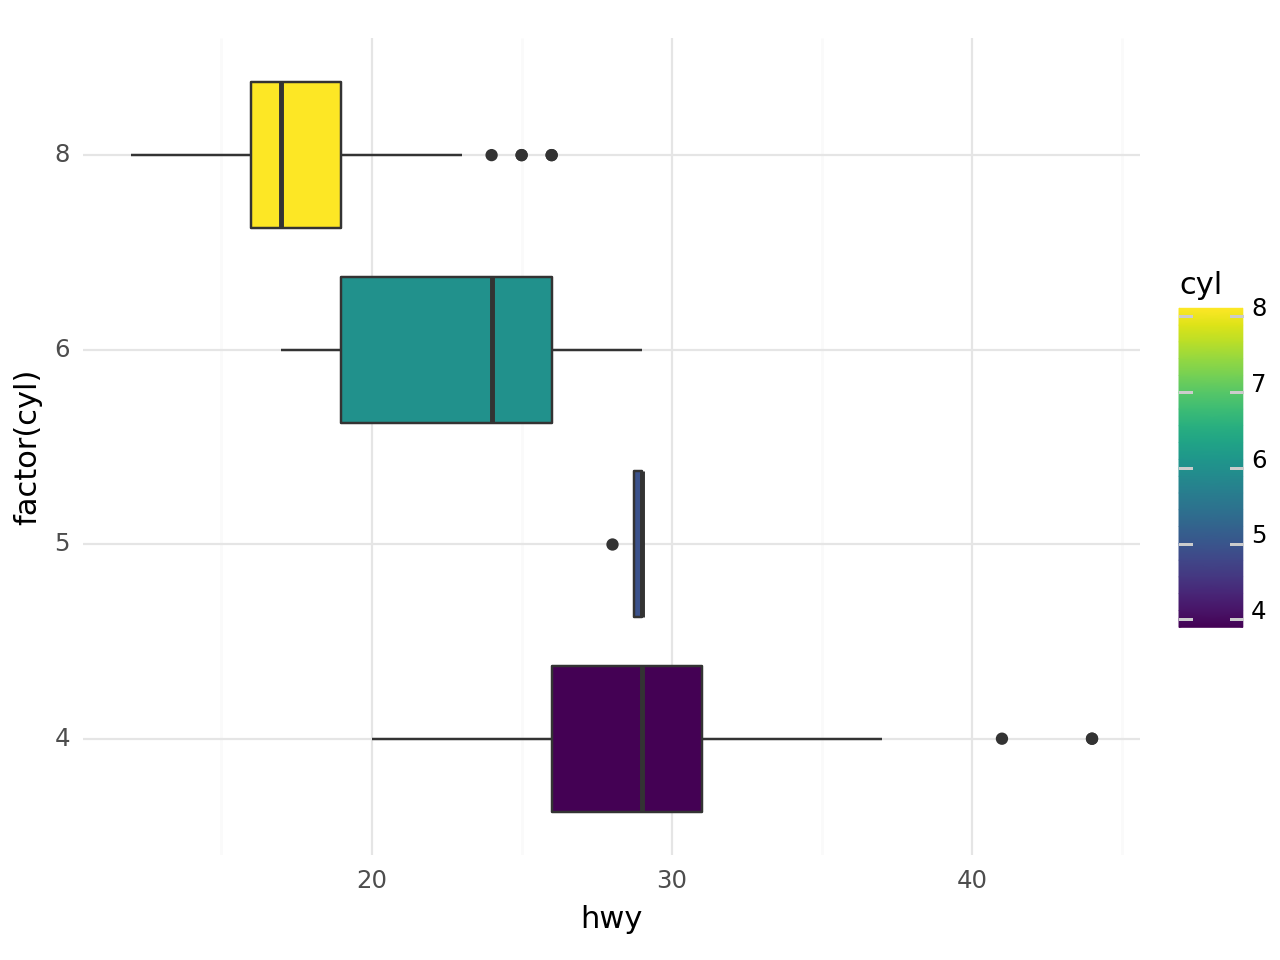

<Figure Size: (640 x 480)>

In [24]:
ggplot(mpg, aes("factor(cyl)", "hwy")) +\
  geom_boxplot(aes(fill = "cyl")) +\
  coord_flip()

### Các yếu tố khác

Bên cạnh các lớp biểu đồ đã phân tích trên, khi xây dựng biểu đồ với, còn 2 nhóm câu lệnh thường sử dụng:

- `labs`: Đặt tên bản đồ, chú giải, tên các trục
- `theme`: Sử dụng để có bản đồ đẹp và phù hợp hơn


#### Labs

Để điều chỉnh tên biểu đồ, chú giải, ta có thể sử dụng câu lệnh `labs`

```python
labs(title = "title",
     subtitle = "subtitle",
     x = "Trục x",
     y = "Trục y",
     caption = "Footnote")
```

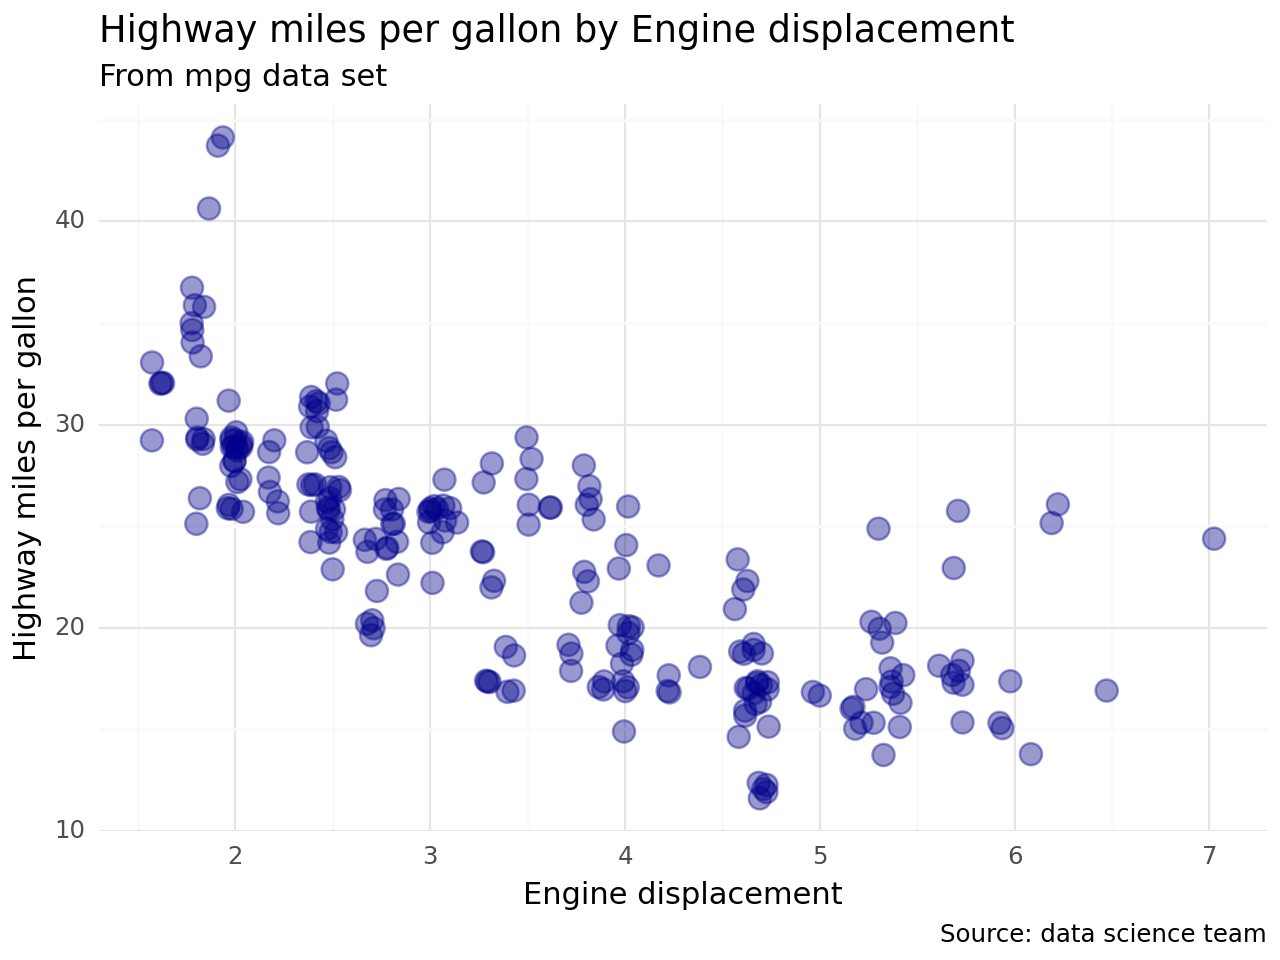

<Figure Size: (640 x 480)>

In [25]:
ggplot(mpg, aes("displ", "hwy")) +\
  geom_point(color = "darkblue", alpha = 0.4, position = "jitter", size = 4) +\
  labs(title = "Highway miles per gallon by Engine displacement",
       subtitle = "From mpg data set",
       x = "Engine displacement", 
       y = "Highway miles per gallon",
       caption = "Source: data science team")

#### Theme

Khi xây dựng biểu đồ với `ggplot2`, ta có thể sử dụng rất nhiều `theme` có sẵn nhưng được dùng nhiều nhất là `theme_bw()`, `theme_classic()`, `theme_minimal()`

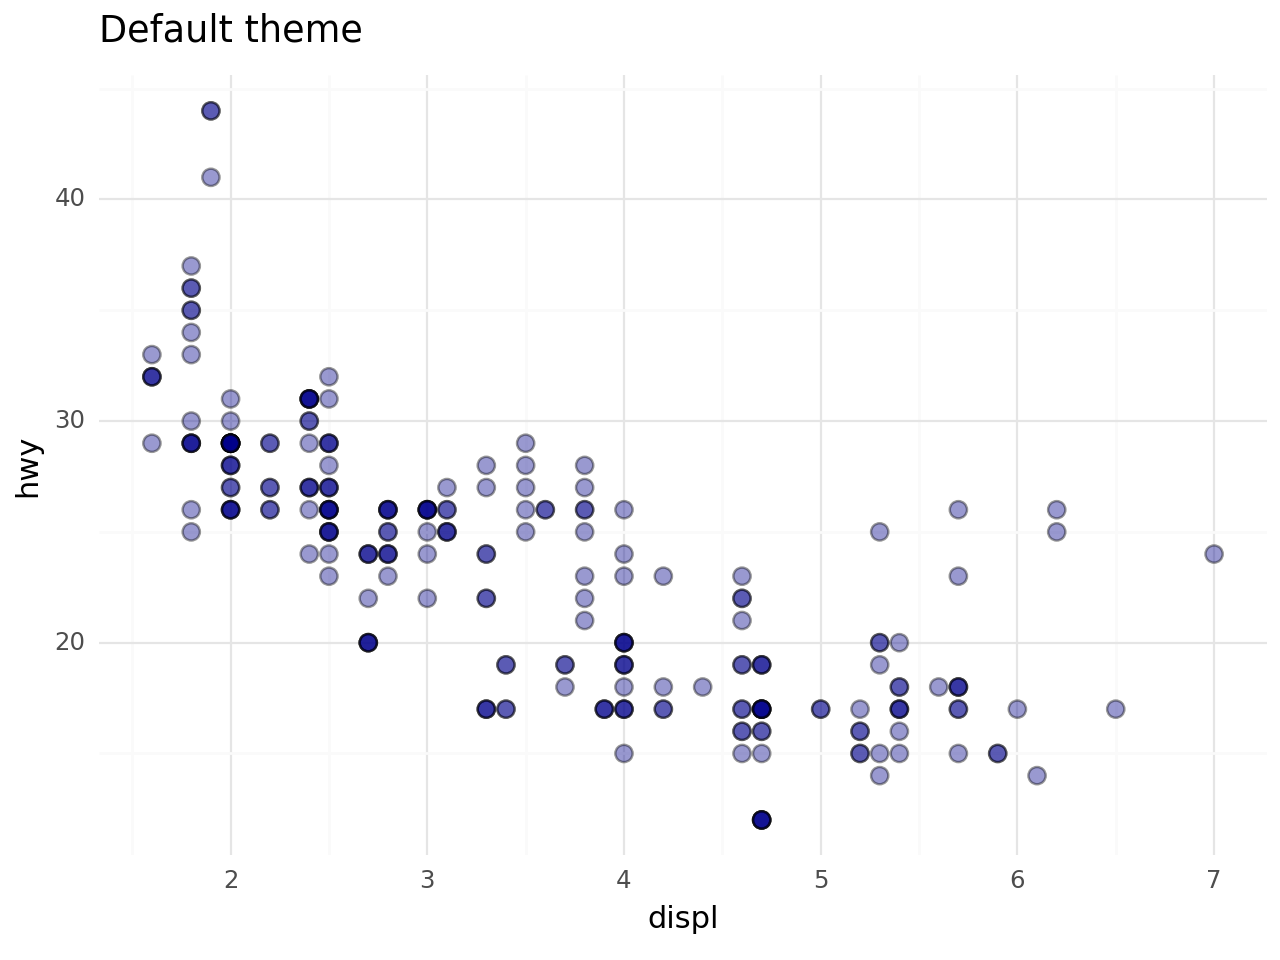

<Figure Size: (640 x 480)>

In [26]:

p = ggplot(mpg, aes("displ", "hwy")) +\
  geom_point(fill = "darkblue", alpha = 0.4,  size = 3)

p + labs(title = "Default theme")

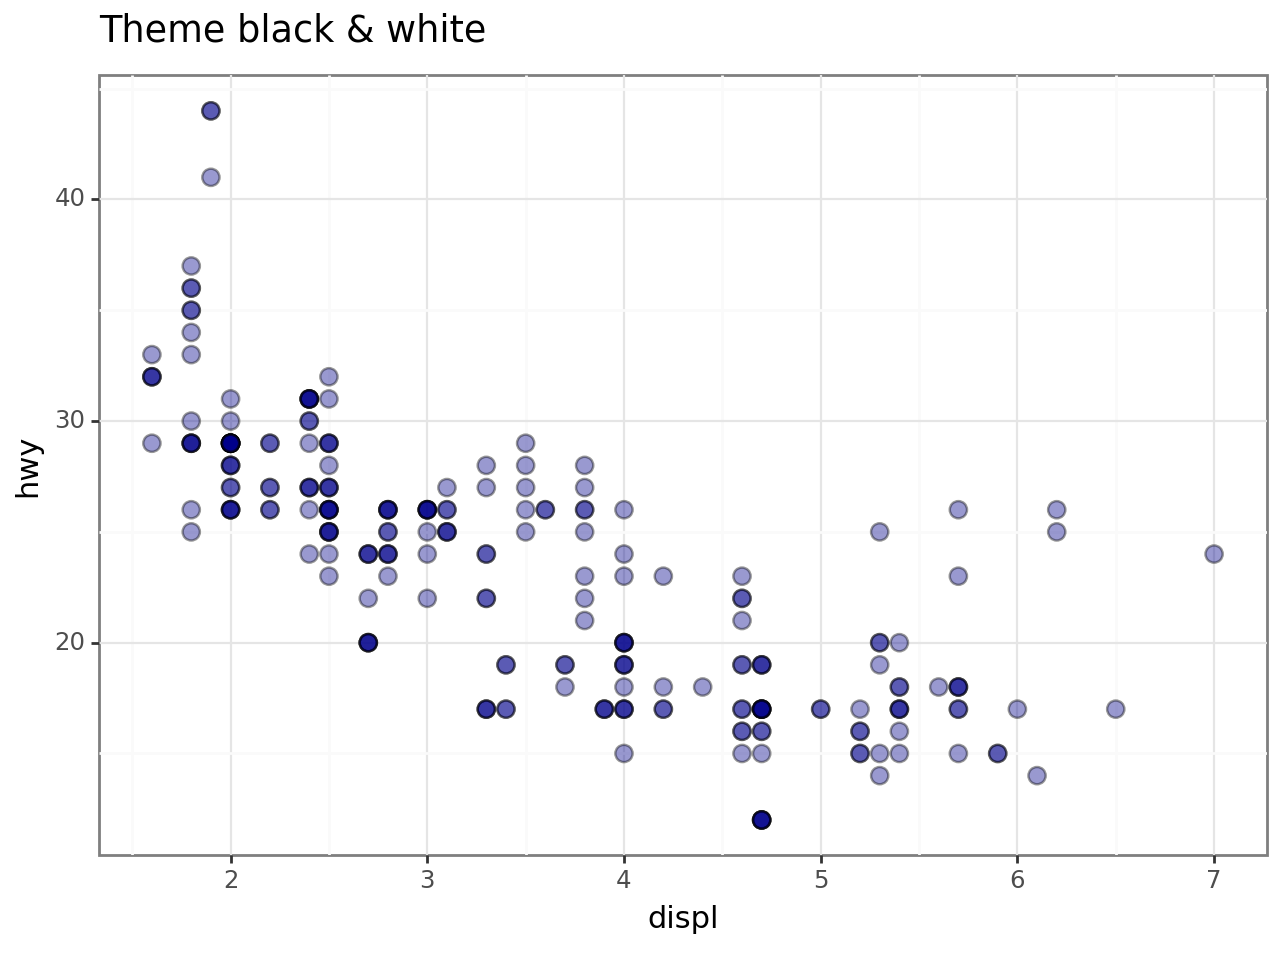

<Figure Size: (640 x 480)>

In [27]:
p + labs(title = "Theme black & white") + theme_bw()

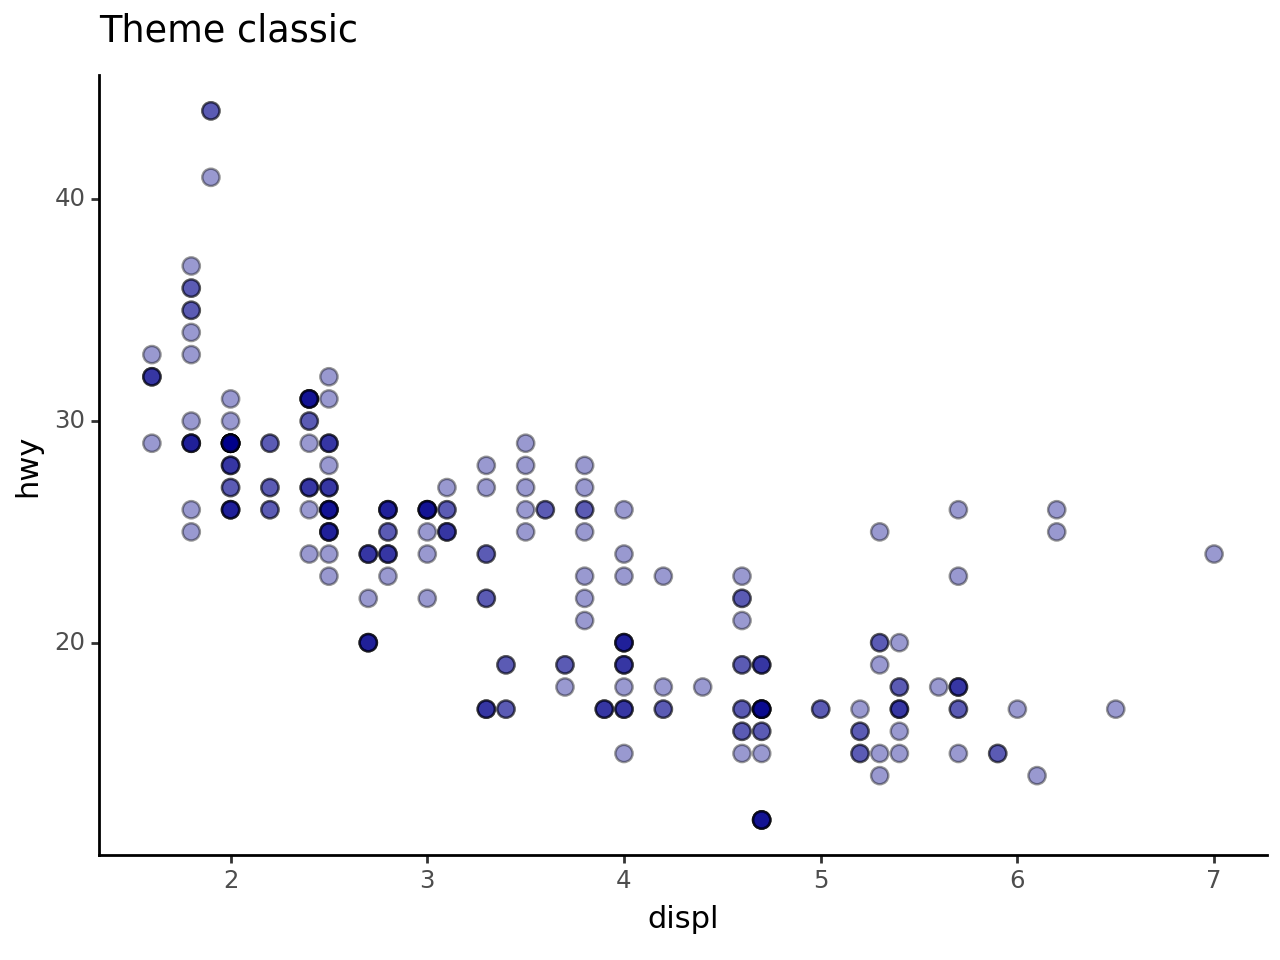

<Figure Size: (640 x 480)>

In [28]:
p + labs(title = "Theme classic") + theme_classic()

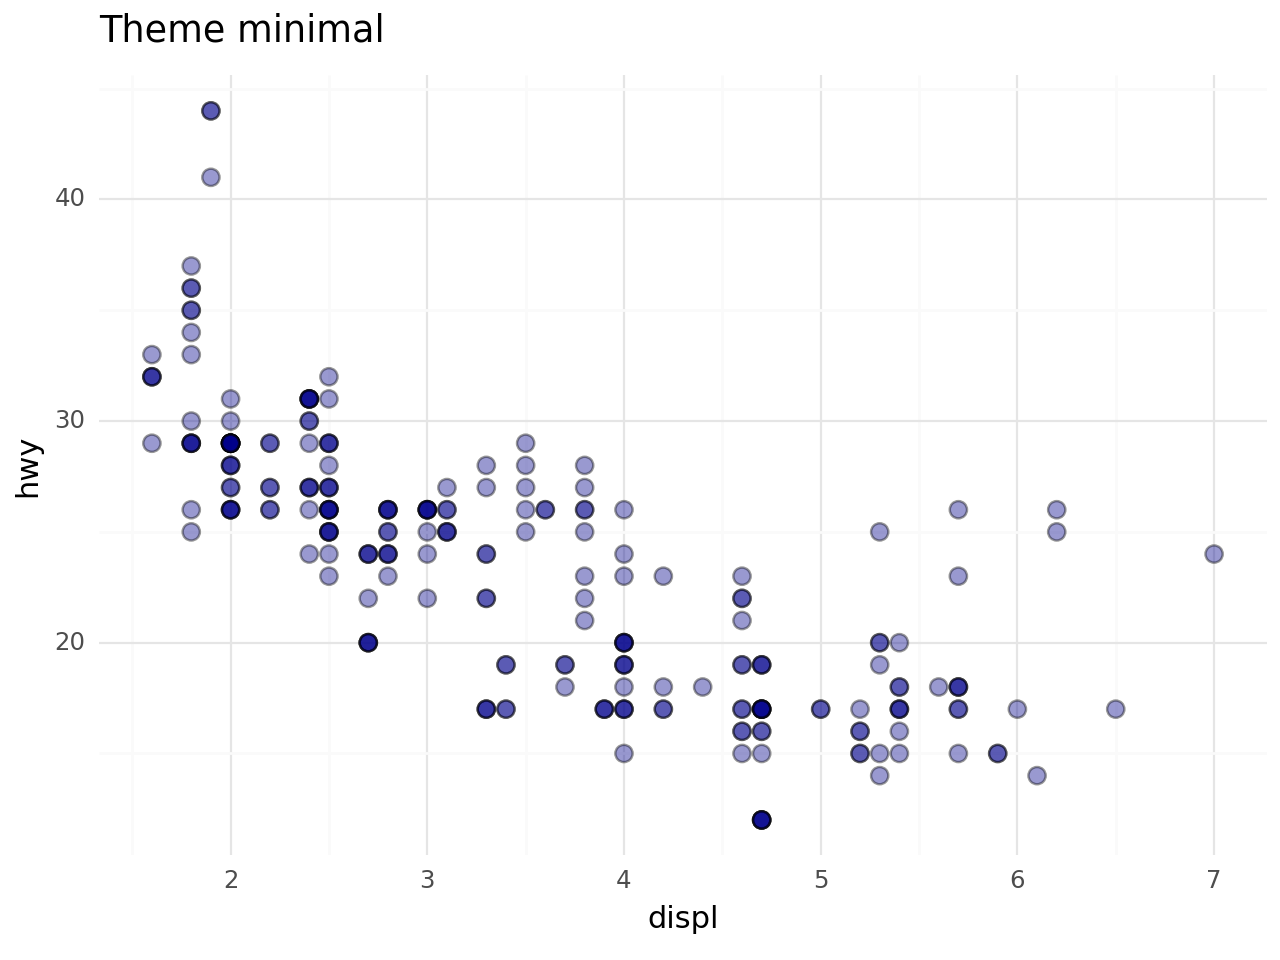

<Figure Size: (640 x 480)>

In [29]:
p + theme_minimal() + labs(title = "Theme minimal")

Để tùy chỉnh các thành phần có sẵn trong biểu đồ, ta có thể sử dụng hàm `theme` để customize từng thành phần như sau.

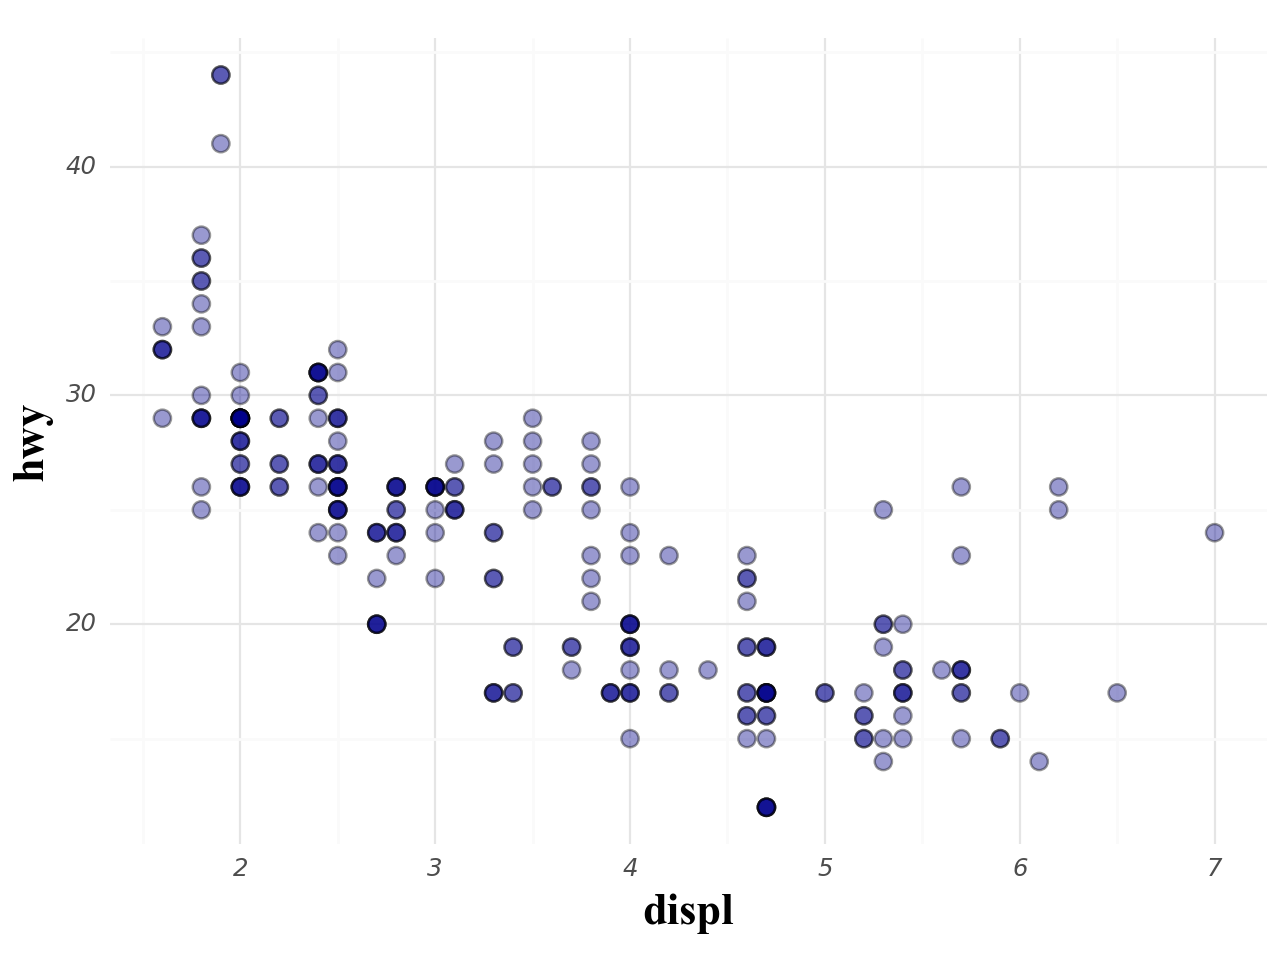

<Figure Size: (640 x 480)>

In [30]:
p + theme(
  # Tên title
  axis_title = element_text(family = "serif", face = "bold", fontsize = 16),
  # Tên của trục x và y
  axis_title_x = element_text(family = "serif", face = "bold"),
  axis_title_y = element_text(family = "serif", face = "bold"),
  # Chữ trên trục
  axis_text = element_text(face = "italic"),
  # Xóa phần nền trong panel
  panel_background = element_blank()
)


Để xem các yếu tố có thể tùy chỉnh trong `theme`, ta có thể sử dụng câu lệnh `plotnine.theme??`

### Thay đổi màu trong biểu đồ

Hệ mã màu trong `plotnine` được chia làm 2 nhóm chính:

- `color`: Với các nhóm biểu đồ điểm, đường (`point`, `line`)
- `fill`: Với các biểu đồ như biểu đồ cột, miền, boxplot

Bên cạnh đó, dải màu cũng được chia làm 2 nhóm

- Biến liên tục
- Biến rời rạc

**Với biến màu rời rạc**

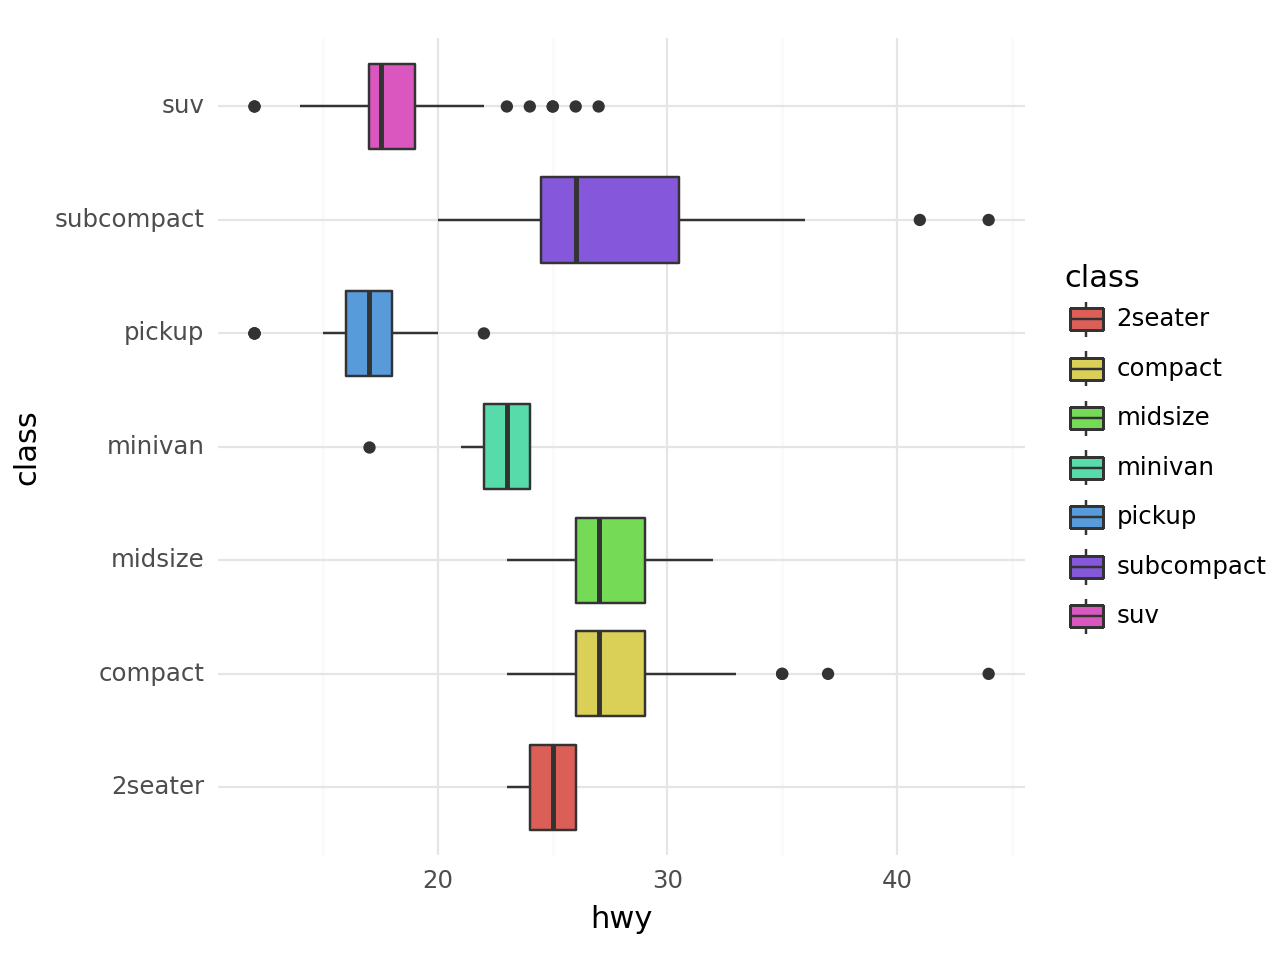

<Figure Size: (640 x 480)>

In [31]:
# Điều chỉnh màu thủ công
p = ggplot(mpg, aes("class", "hwy")) +\
  geom_boxplot(aes(fill = "class")) +\
  coord_flip()
p

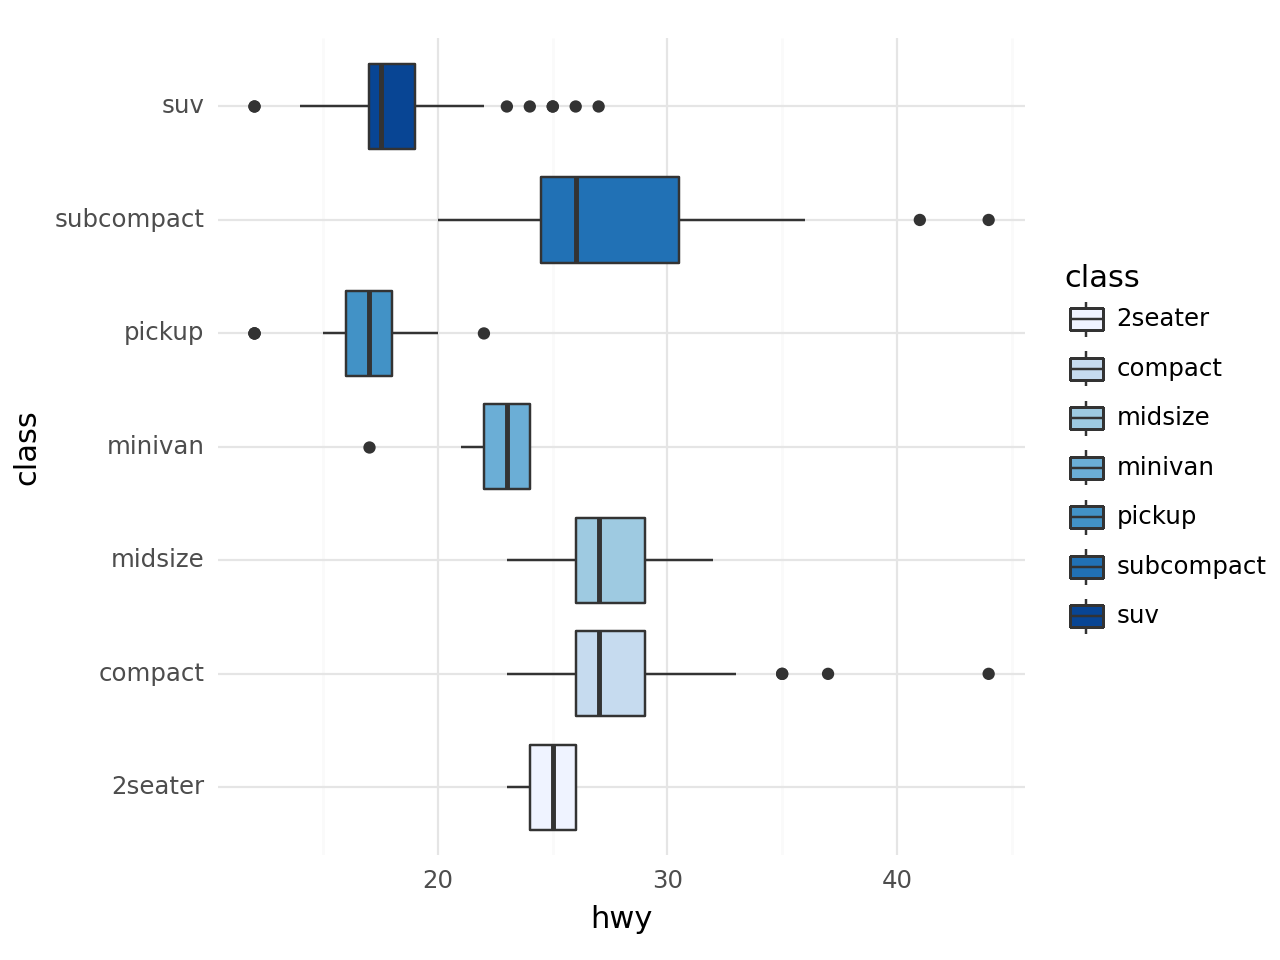

<Figure Size: (640 x 480)>

In [32]:
p + scale_fill_brewer(palette=1)

## Các mẹo với `plotnine`

### Đặt global option cho theme

Khi bắt đầu project, ta có thể đặt một `theme` để sử dụng với tất cả biểu đồ với hàm `theme_set`.

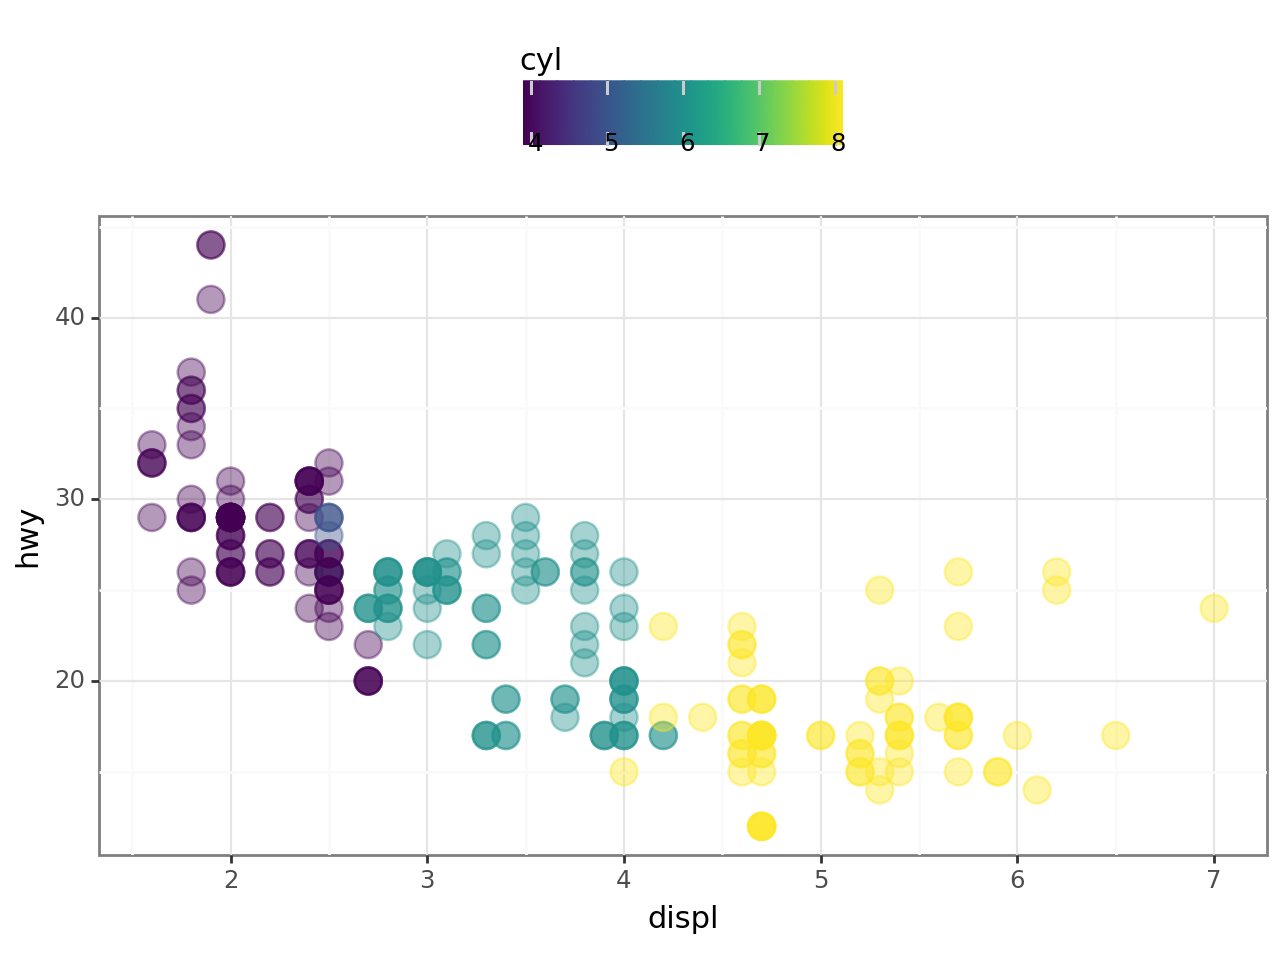

<Figure Size: (640 x 480)>

In [33]:
# Set theme
theme_set(theme_bw() +\
          theme(legend_position = "top"))

ggplot(mpg, aes("displ", "hwy")) +\
  geom_point(aes(color = "cyl"), alpha = 0.4,  size = 5)

### Loại bỏ legend trong 1 lớp

c:\Users\Hoang Duc Anh\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
c:\Users\Hoang Duc Anh\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
c:\Users\Hoang Duc Anh\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
c:\Users\Hoang Duc Anh\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
c:\Users\Hoang Duc Anh\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
c:\Us

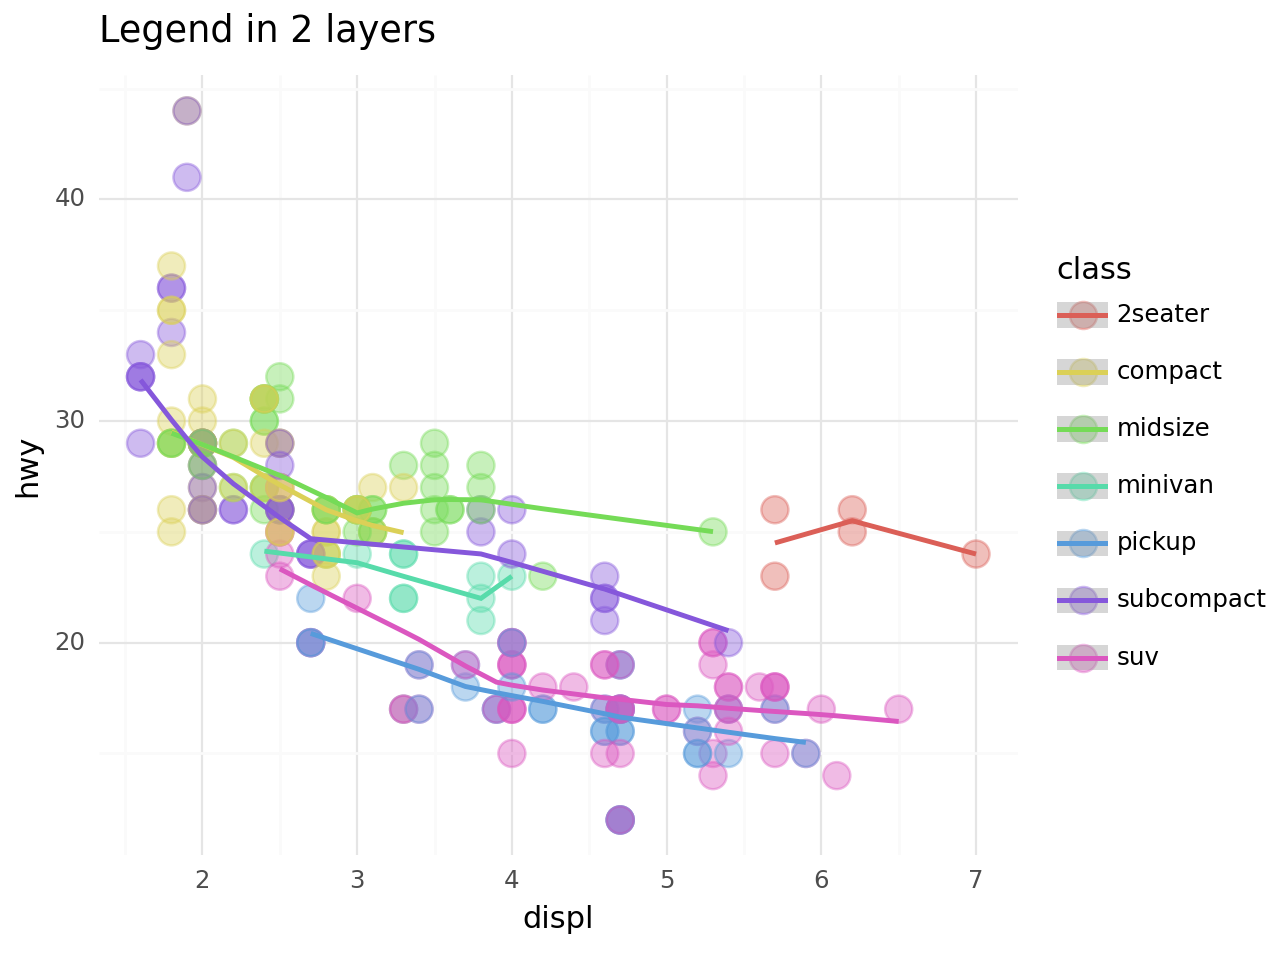

<Figure Size: (640 x 480)>

In [34]:
theme_set(theme_minimal())
# Để cả 2 legend
ggplot(mpg, aes("displ", "hwy")) +\
  geom_point(aes(color = "class"), alpha = 0.4,  size = 5) +\
  geom_smooth(aes(color = "class")) +\
  labs(title = "Legend in 2 layers")



c:\Users\Hoang Duc Anh\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
c:\Users\Hoang Duc Anh\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
c:\Users\Hoang Duc Anh\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
c:\Users\Hoang Duc Anh\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
c:\Users\Hoang Duc Anh\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
c:\Us

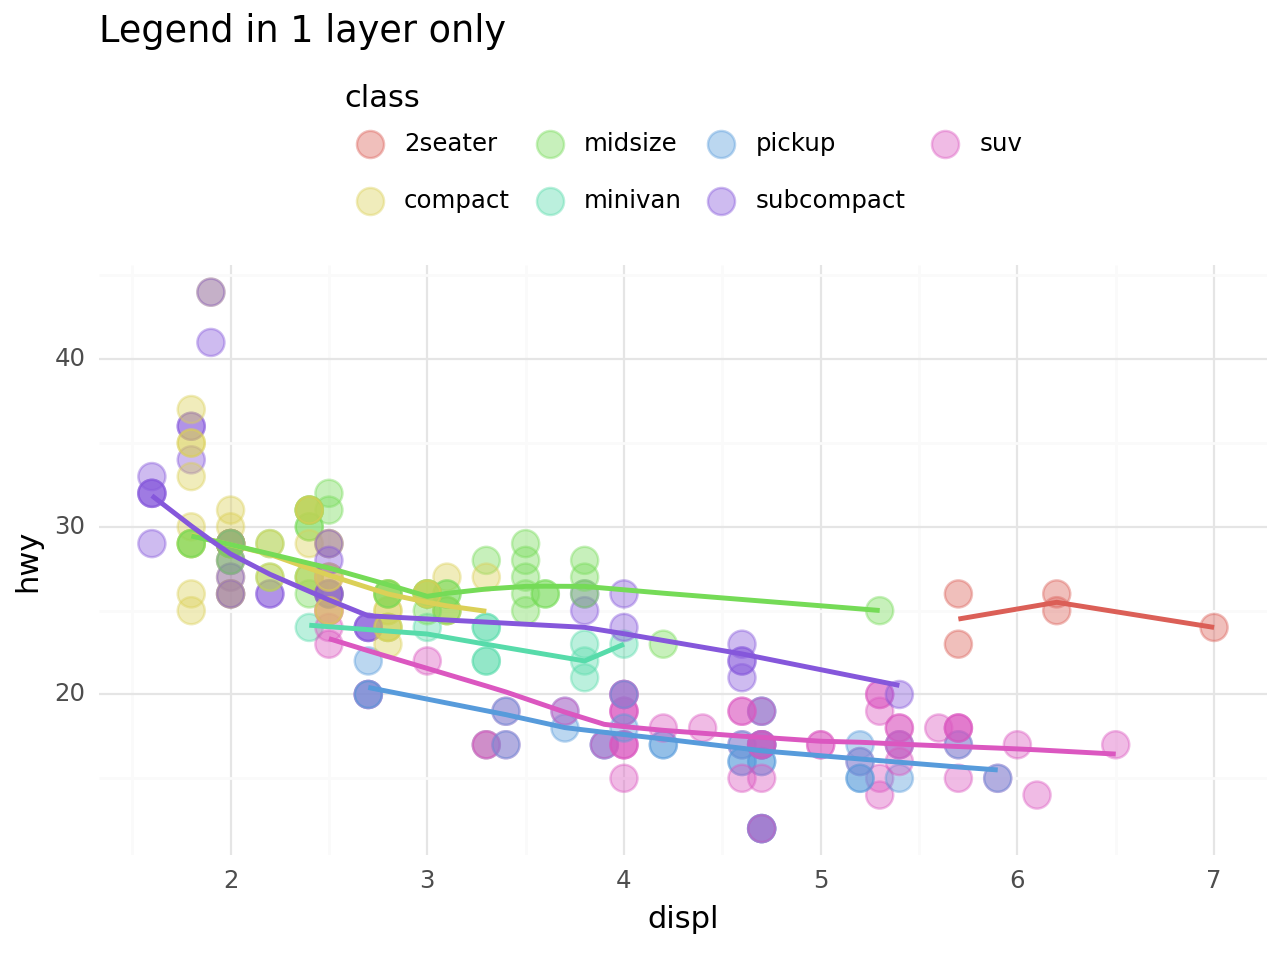

<Figure Size: (640 x 480)>

In [35]:
# Loại bỏ 1 legend
ggplot(mpg, aes("displ", "hwy")) +\
  geom_point(aes(color = "class"), alpha = 0.4,  size = 5) +\
  geom_smooth(aes(color = "class"), show_legend = False) +\
  labs(title = "Legend in 1 layer only") +\
  theme(legend_position= "top")

### Làm nổi bật biểu đồ với `annotate`

Trong biểu đồ, để tạo hiệu ứng tốt nhất, ta có thể thêm các vùng highlight để làm nổi bật biểu đồ bằng cách sử dụng `annotate`. 

Hàm `annotate` tương tự như `geom` nhưng khác biệt ở chỗ, tham số của annotate được thêm vào dưới dạng vector. 

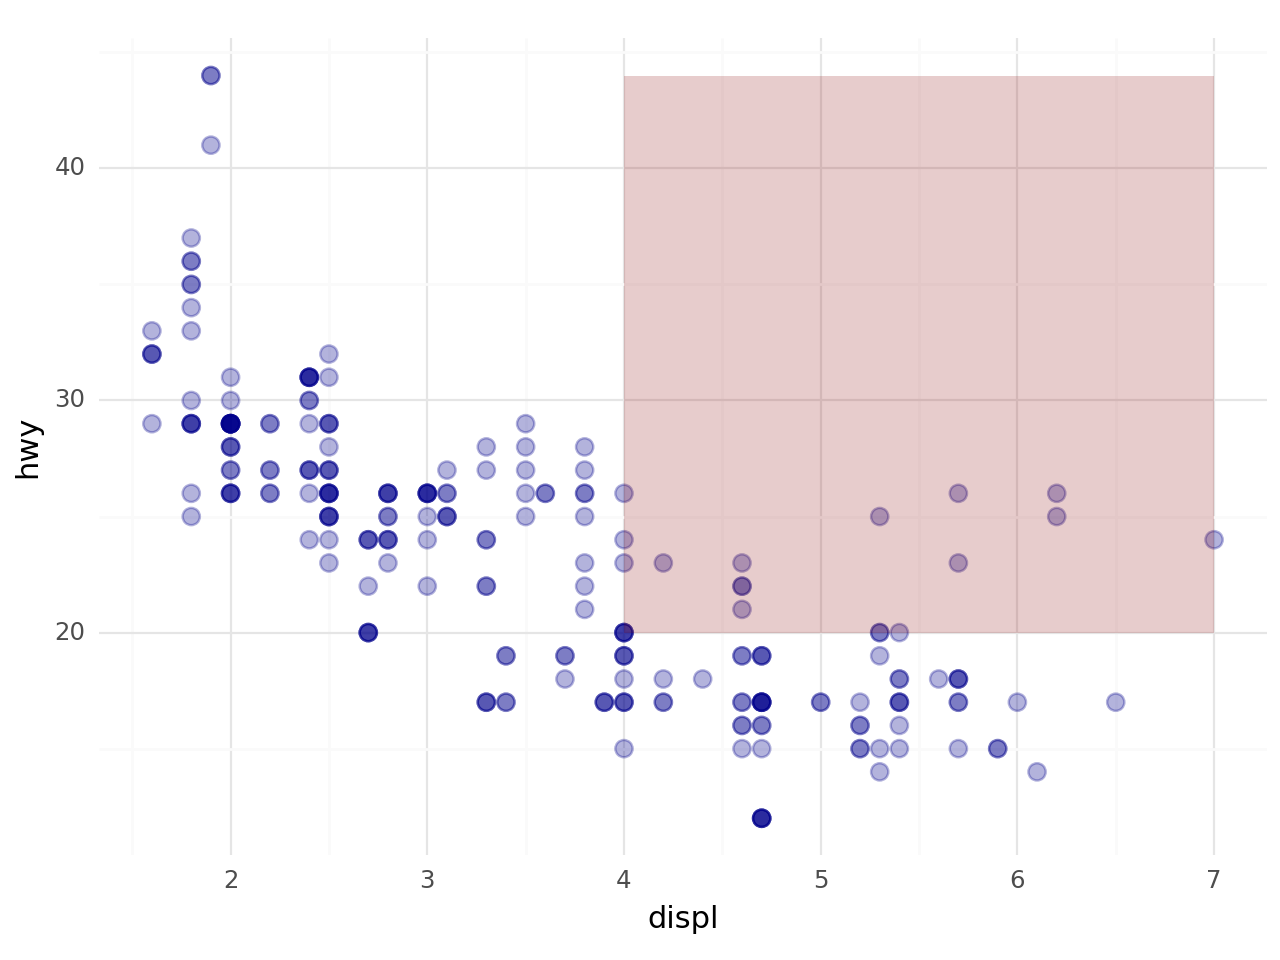

<Figure Size: (640 x 480)>

In [36]:
ggplot(mpg, aes(x = "displ", y = "hwy")) + \
  geom_point(color = "darkblue", alpha = 0.3, size = 3) +\
  annotate(xmin = 4, xmax = 7, ymin = 20, ymax = 44,
           geom = "rect", fill = "darkred", alpha = 0.2)


### Hiển thị text biểu đồ ở giữa bar chart

- Sử dụng option `position = position_stack(vjust = 0.5)` 

In [37]:
df = mpg.groupby("class").\
  size().\
  reset_index(name = "no")
df

C:\Users\Hoang Duc Anh\AppData\Local\Temp\ipykernel_21780\179534537.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,class,no
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


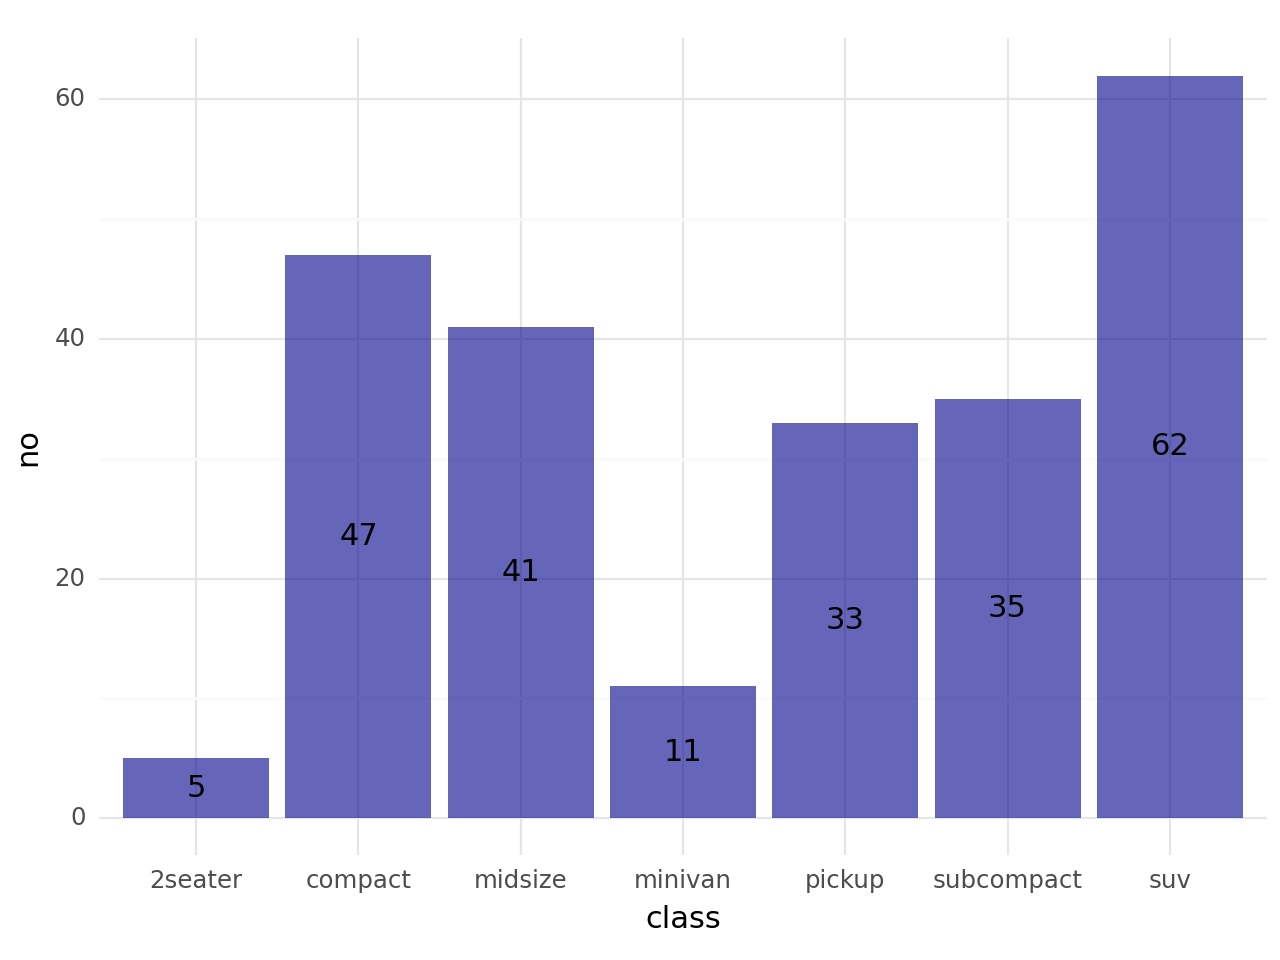

<Figure Size: (640 x 480)>

In [38]:
ggplot(df, aes("class", "no")) +\
  geom_bar(stat = "identity", fill = "darkblue", alpha = 0.6) +\
  geom_text(aes(label = "no"), position = position_stack(vjust = 0.5))

## Các package bổ trợ


### Kết hợp nhiều biểu đồ với `patchworklib`

Khi trực quan hóa dữ liệu, ta có thể kết hợp nhiều biểu đồ với nhau để thành 1 biểu đồ duy nhất. Để kết hợp các biểu đồ của `ggplotnine`, ta có thể sử dụng package `patchworklib`.

In [39]:
import patchworklib as pw
from plotnine.data import mtcars
from plotnine import *

p1 = (ggplot(mtcars, aes("mpg", "cyl")) +\
    geom_point(aes(color = "factor(vs)"), size = 4) +\
    theme_minimal())
p2 = (ggplot(mtcars, aes("mpg", "disp")) \
        + geom_point(color = "darkblue", alpha = 0.3, size = 2) \
        + geom_smooth(color = "darkred") \
        + theme_minimal())
p3 = (ggplot(mtcars, aes("factor(vs)", "mpg")) \
     + geom_boxplot(aes(fill = "factor(vs)")) \
     + theme_minimal())

In [40]:
# Load object plotnine
p1_new = pw.load_ggplot(p1, figsize = (4, 5))
p2_new = pw.load_ggplot(p2, figsize = (2, 2))
p3_new = pw.load_ggplot(p3, figsize = (2, 2))

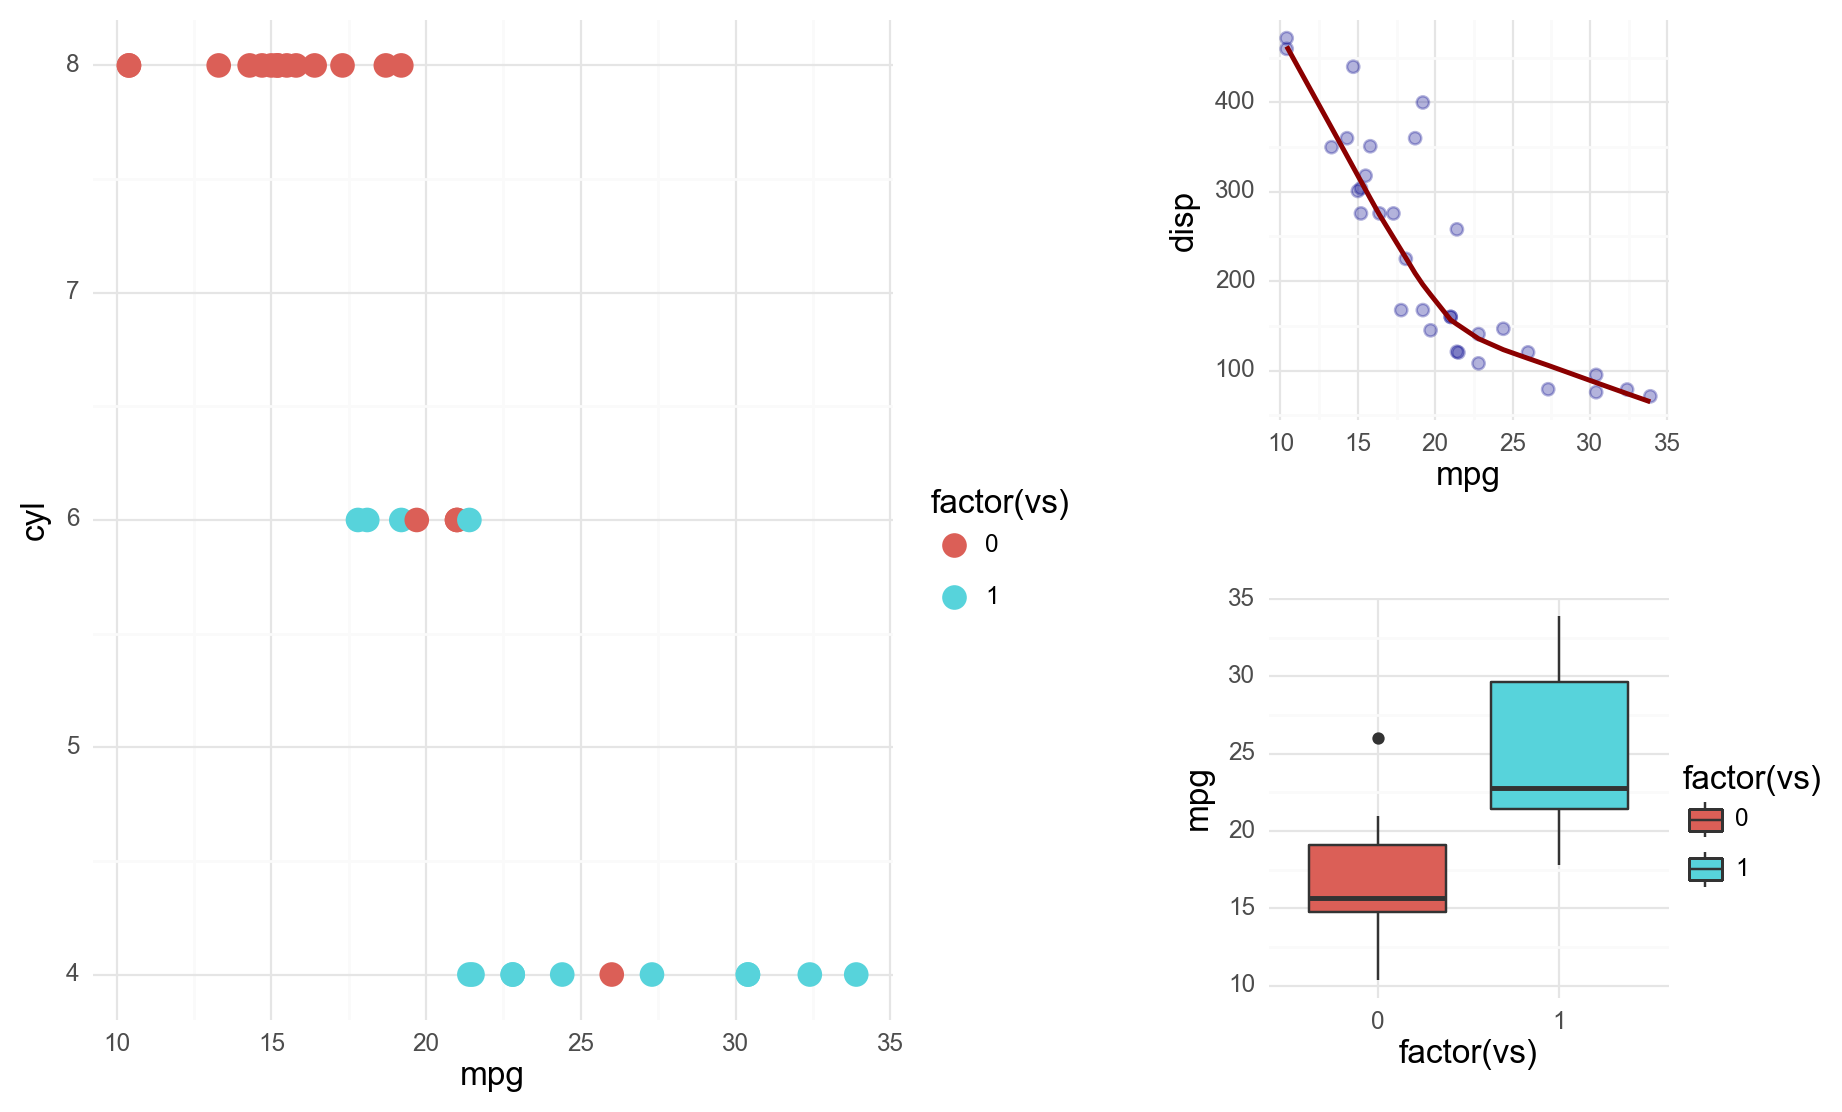

In [41]:
# Kết hợp biểu đồ
p1_new + (p2_new / p3_new)

### Biểu đồ động với lets-plot

Ta có thể tạo biểu đồ theo dạng plotnine động với `lets-plot`

In [42]:
from lets_plot import *
LetsPlot.setup_html()

In [43]:
ggplot(mpg, aes("class", "displ")) +\
    geom_boxplot(aes(fill = "class")) +\
    coord_flip()

Các cú pháp của `lets-plot` tương tự như `plotnine` và hỗ trợ rất tốt dạng biểu đồ động. Tuy nhiên, `lets-plot` chưa hỗ trợ nhiều các option tùy biến. 
Khi làm việc thực tế, ta có thể sử dụng cả 2 tùy trường hợp

## Tài liệu tham khảo

- https://aeturrell.github.io/python4DS/data-visualise.html
- https://lets-plot.org/python/index.html
- https://plotnine.org/reference/